In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
def get_df(file_str):
    mf = pd.read_csv(file_str)
    mf['t_diff'] = mf.t.diff()
    mf['success'] = (mf.r > 9000)*1.
    #print(mf.head())
    print(mf.describe())
    print("Mean Reward last 100 Episodes: {}".format(np.mean(mf.r.iloc[-100:])))
    return mf

def get_scatter_plots(df):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.r,marker='.')
    plt.ylabel('reward')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.l,marker='.')
    plt.ylabel('timesteps per episode')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.t_diff,marker='.')
    plt.ylabel('time per episode')
    plt.xlabel('episode')
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    plt.scatter(df.index,df.success,marker='.')
    plt.ylabel('success')
    plt.xlabel('episode')
    plt.show()
    

def get_rolling_plots(df):
    rolling_window_size = 100
    if len(df.r) < 1000:
        rolling_window_size = 50
        
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.r.rolling(rolling_window_size).mean())
    plt.ylabel('reward')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.l.rolling(rolling_window_size).mean())
    plt.ylabel('timesteps')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.t_diff.rolling(rolling_window_size).mean())
    plt.ylabel('time')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df.success.rolling(rolling_window_size).mean())
    plt.ylabel('success')
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    

def get_results(lvl_array):
    for i in lvl_array:
        print(i)
        file_str = 'levels/{}/monitor.csv'.format(i)
        df = get_df(file_str)
        print(i)
        get_scatter_plots(df)
        print(i)
        get_rolling_plots(df)
        
def get_level_comparison(lvl_array):
    df_array = []
    for i in range(len(lvl_array)):
        file_str = 'levels/{}/monitor.csv'.format(lvl_array[i])
        df_array.append(pd.read_csv(file_str))
        df_array[i]['t_diff'] = df_array[i].t.diff()
        df_array[i]['success'] = (df_array[i].r > 9000)*1.
        print(lvl_array[i])
        print(df_array[i].describe())
        
    get_rolling_comparison(df_array,lvl_array)

    
def plot_rolling_mean(df,col_name,rolling_window_size=100):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.tsplot(df[col_name].rolling(rolling_window_size).mean())
    plt.ylabel(col_name)
    plt.xlabel('mean of last {} episodes'.format(rolling_window_size))
    plt.show()
    
    
def get_rolling_comparison(df_array, lvl_array):
    rolling_window_size = 100
    if len(df_array[0]) < 1000:
        rolling_window_size = 50
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " reward")
        temp_index += 1
        plot_rolling_mean(i,'r',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " success")
        temp_index += 1
        plot_rolling_mean(i,'success',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        print(lvl_array[temp_index], " timesteps")
        temp_index += 1
        plot_rolling_mean(i,'l',rolling_window_size)
        
    temp_index = 0
    for i in df_array:
        a4_dims = (11.7, 8.27)
        fig, ax = plt.subplots(figsize=a4_dims)
        print(lvl_array[temp_index], " reward")
        plt.scatter(i.index,i.r,marker='.')
        plt.ylabel('reward')
        plt.xlabel('episode')
        plt.show()    
        temp_index += 1
        

marblezone1/ppo_traj_3
                  r             l             t        t_diff       success
count  13929.000000  13929.000000  13929.000000  13928.000000  13929.000000
mean    5412.302250   4546.943715  34378.974089      5.096626      0.238639
std     2996.622177   3328.981802  22294.326852      3.782105      0.426267
min       69.114471    481.000000      8.267800      0.543687      0.000000
25%     1961.123117   2215.000000  11788.631875      2.500834      0.000000
50%     5120.589019   4178.000000  35485.813559      4.618599      0.000000
75%     7878.688339   5386.000000  54762.801298      5.982730      0.000000
max     9882.971165  18000.000000  70994.078115     23.994290      1.000000
Mean Reward last 100 Episodes: 8500.59669738042
marblezone1/ppo_traj_3


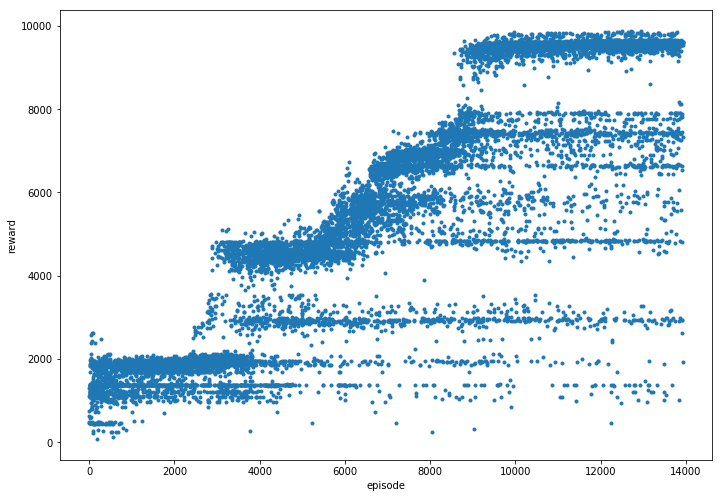

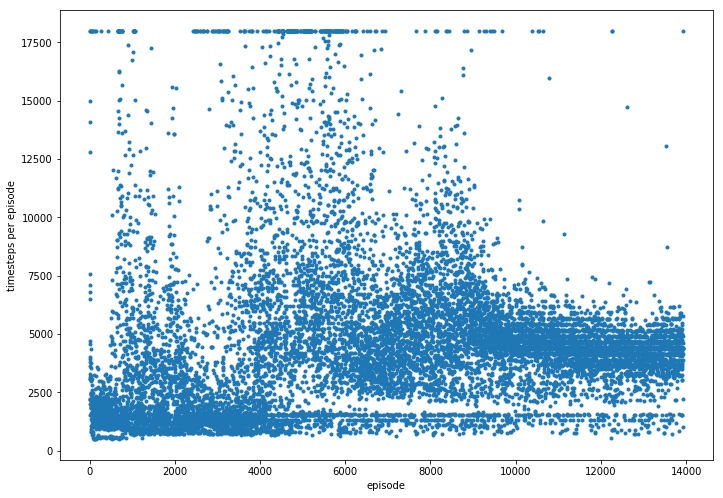

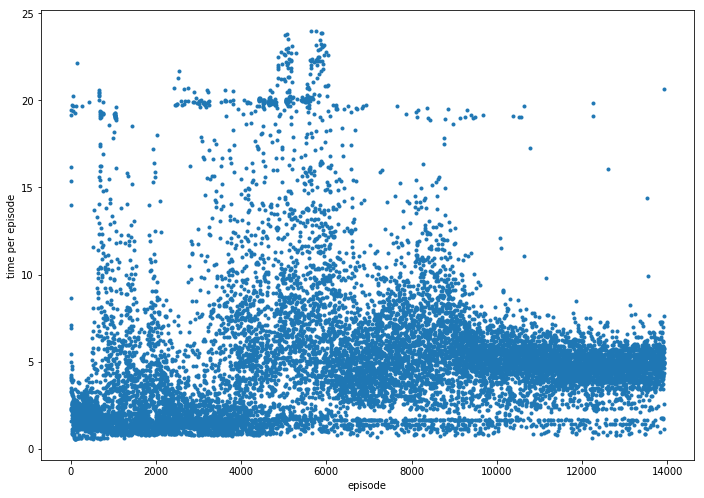

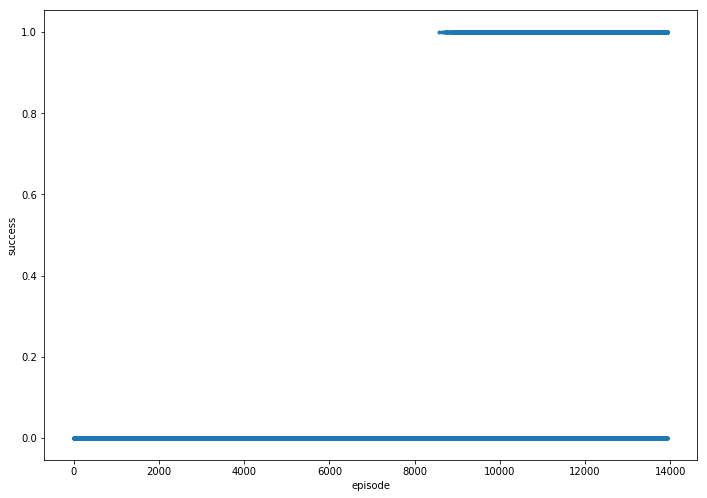

marblezone1/ppo_traj_3


/home/jim/anaconda3/envs/tf3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


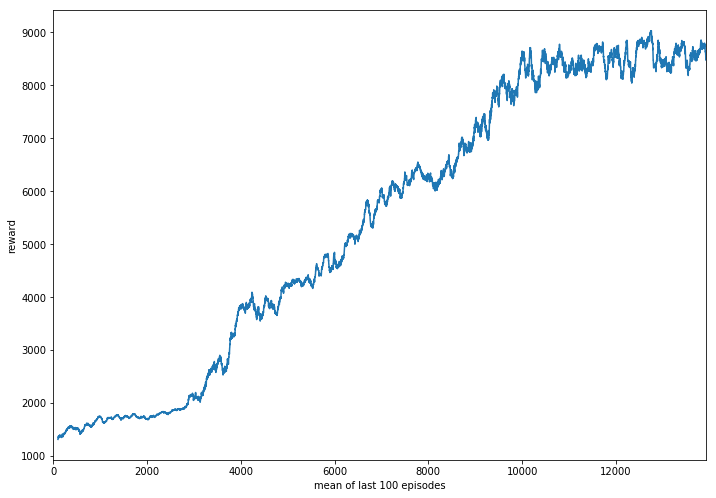

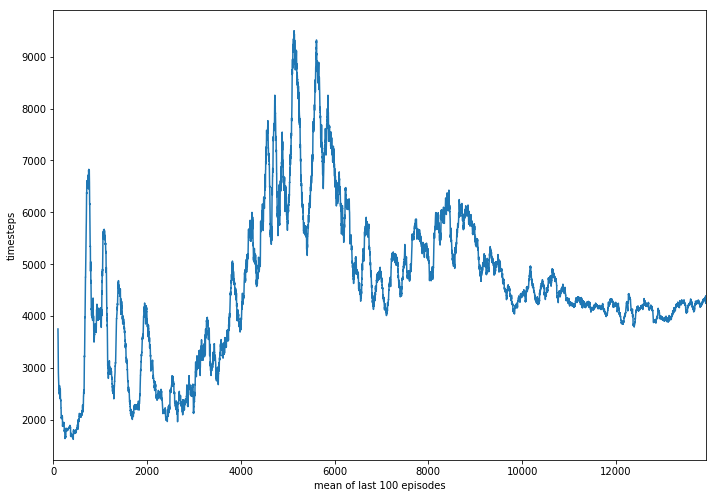

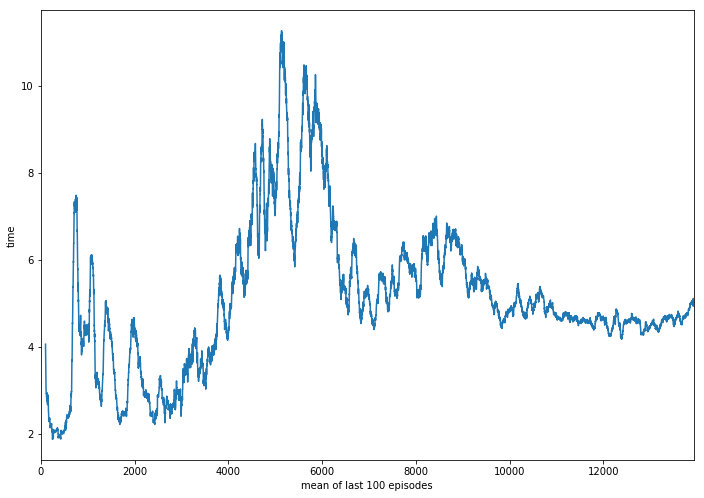

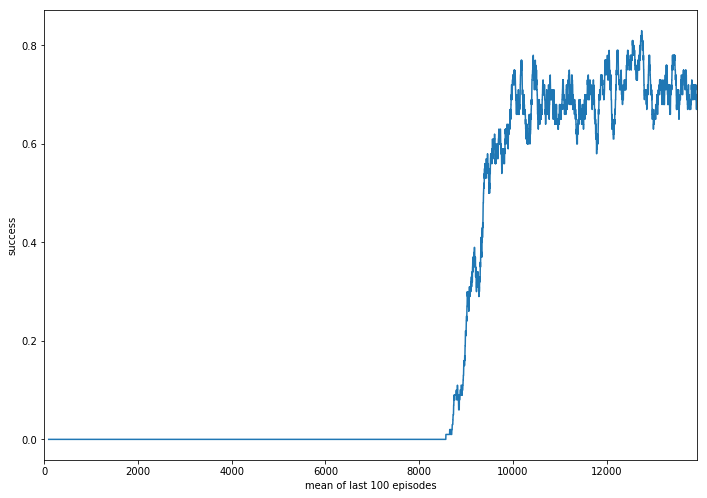

marblezone2/ppo_traj_1
                  r             l             t        t_diff       success
count  12955.000000  12955.000000  12955.000000  12954.000000  12955.000000
mean    3619.193832   2801.816364  15679.615384      3.056977      0.023003
std     2200.158200   2366.625358  11500.220855      2.550116      0.149918
min        1.728111    277.000000      9.507196      0.316076      0.000000
25%     1492.265904   1562.500000   5192.481531      1.739803      0.000000
50%     3682.603646   2230.000000  13822.601890      2.420632      0.000000
75%     4572.580617   3234.500000  24982.227071      3.567357      0.000000
max     9711.689381  18000.000000  39609.590706     19.782902      1.000000
Mean Reward last 100 Episodes: 7089.547907657623
marblezone2/ppo_traj_1


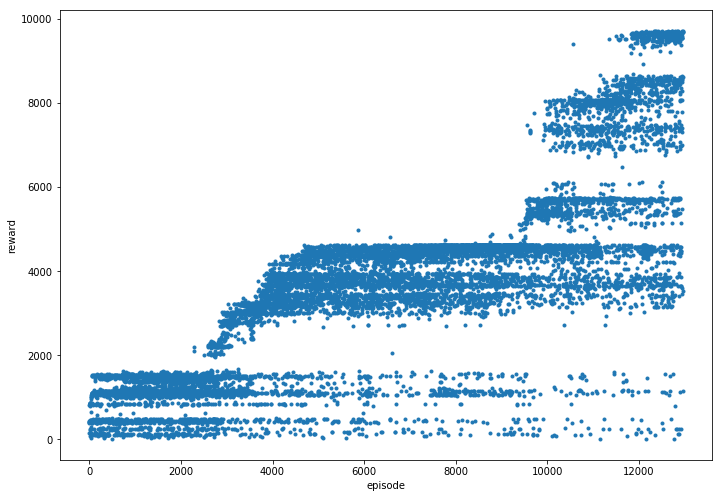

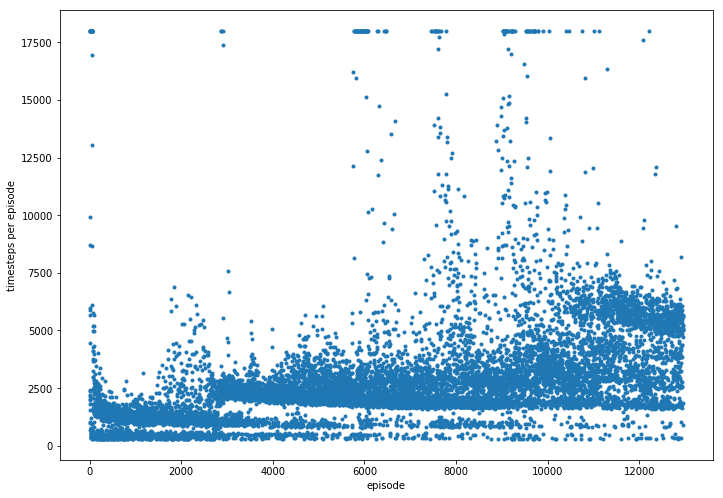

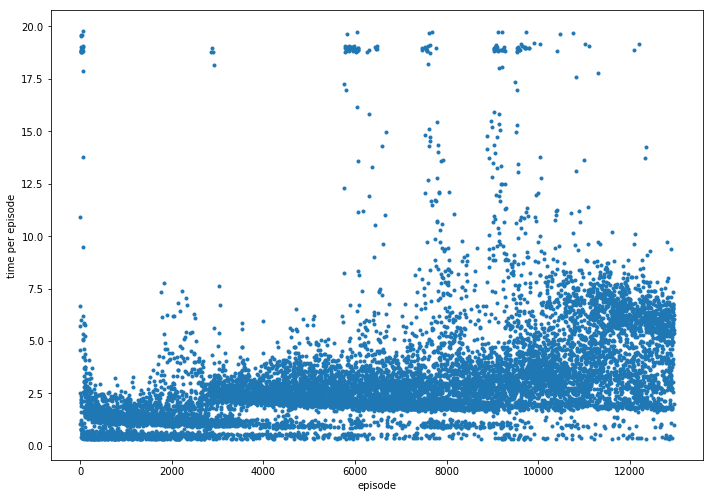

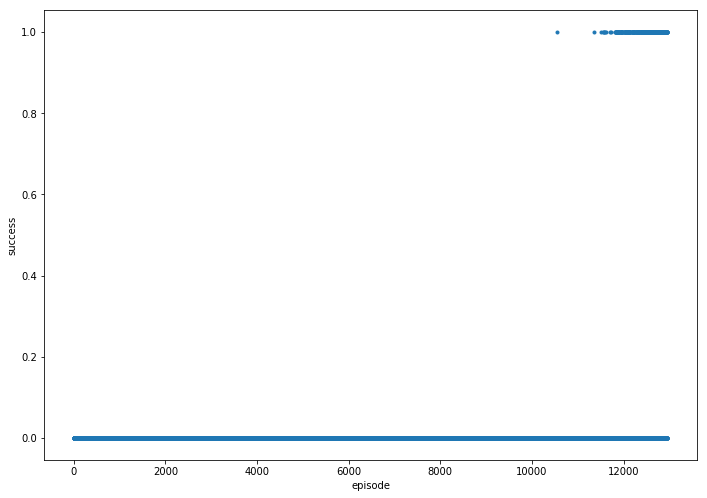

marblezone2/ppo_traj_1


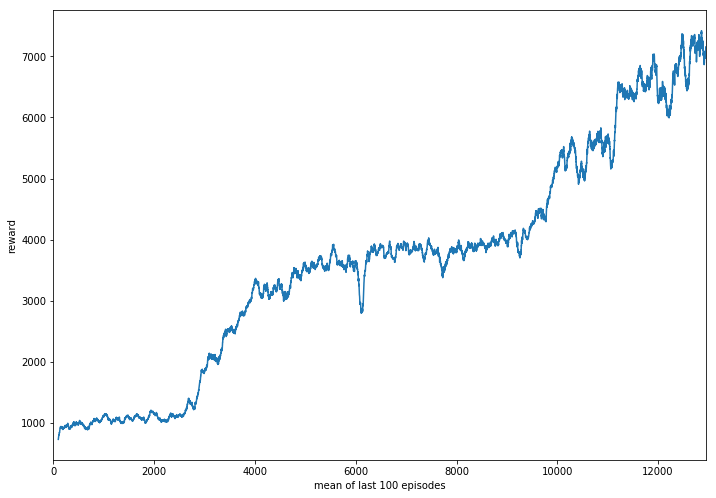

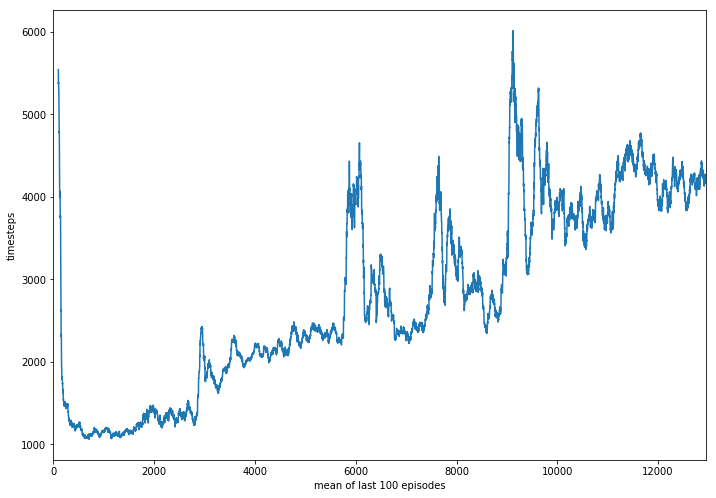

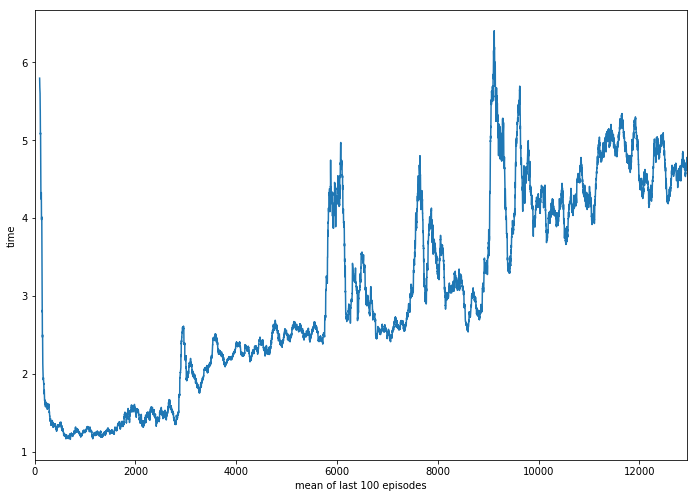

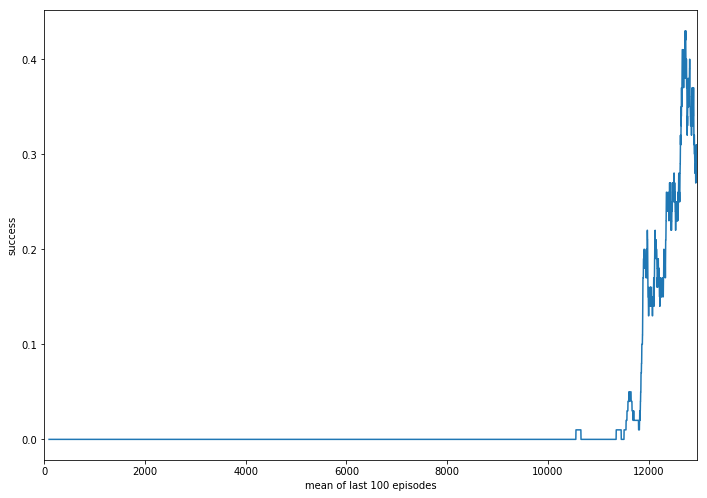

marblezone3/ppo_traj_4
                  r             l              t        t_diff  success
count  11557.000000  11557.000000   11557.000000  11556.000000  11557.0
mean    1120.448163   6919.476075   58972.183633      9.159298      0.0
std      908.947593   6641.979537   32417.228508      8.456178      0.0
min    -1181.788658    398.000000      23.933903      0.523932      0.0
25%      560.220286   1361.000000   27823.973049      1.944419      0.0
50%      623.939368   3693.000000   66785.483871      5.806499      0.0
75%     1970.999952  13220.000000   87169.303781     16.914843      0.0
max     3493.095328  18000.000000  105868.781103     34.977410      0.0
Mean Reward last 100 Episodes: 2509.1784953136744
marblezone3/ppo_traj_4


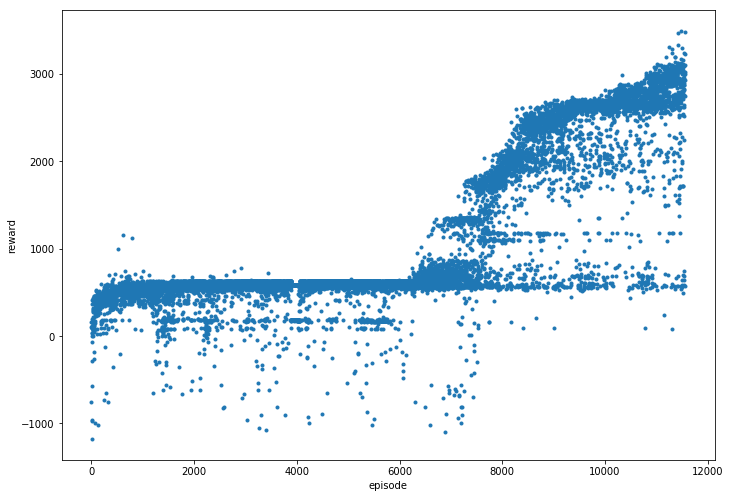

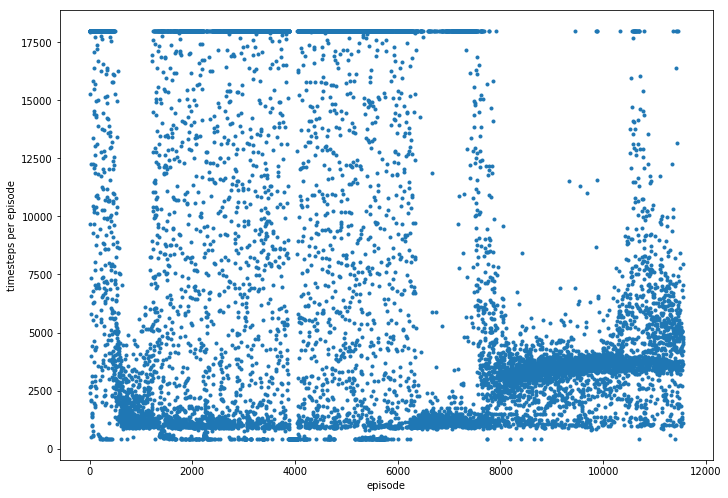

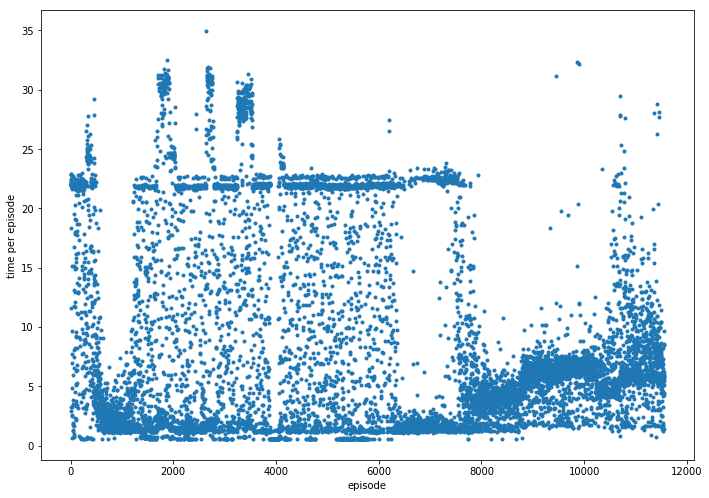

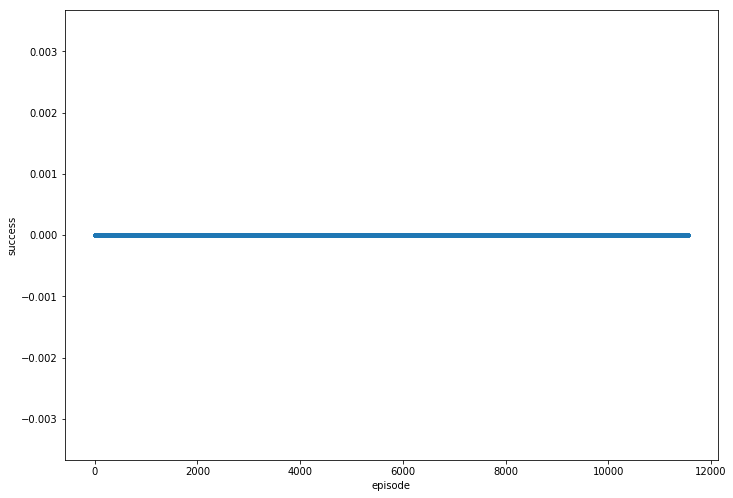

marblezone3/ppo_traj_4


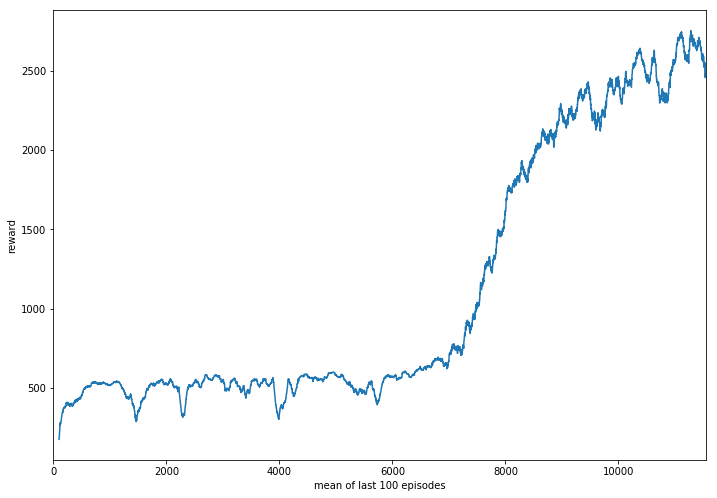

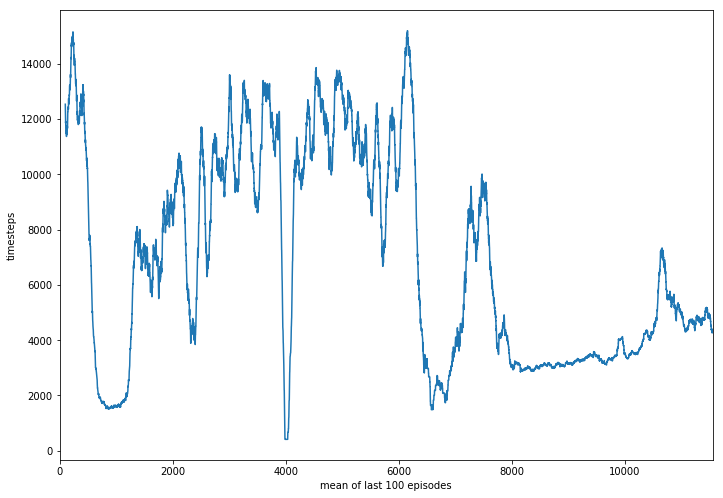

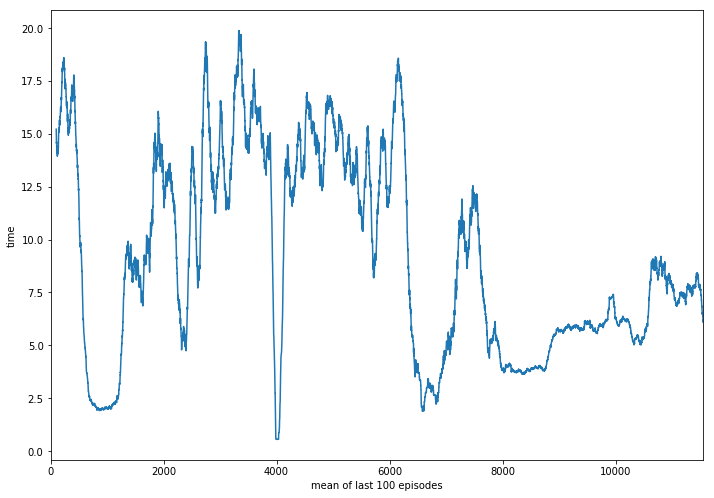

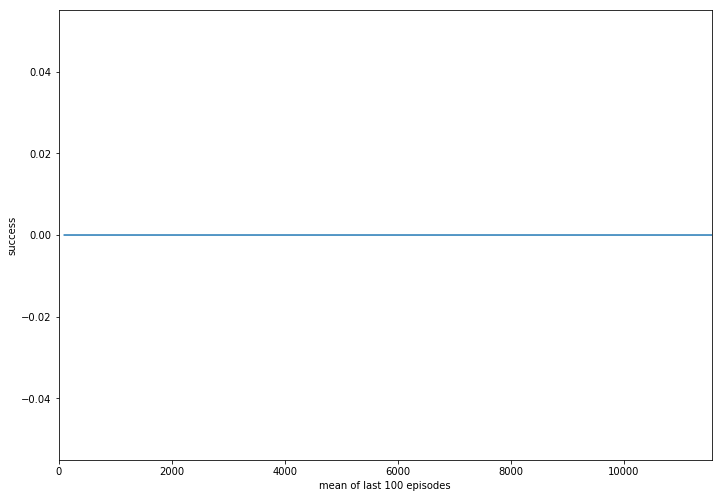

springyardzone1/ppo_traj_0
                 r             l             t       t_diff      success
count  5891.000000   5891.000000   5891.000000  5890.000000  5891.000000
mean   5789.742105   4552.533016  14978.287835     4.923068     0.327788
std    3459.471433   4181.047363   8565.910711     4.443429     0.469447
min       2.425876    212.000000      4.289316     0.248772     0.000000
25%    2583.303632   1860.000000   6950.793205     2.063562     0.000000
50%    6236.757662   4126.000000  15843.055568     4.355436     0.000000
75%    9480.479256   5365.500000  22423.175748     5.911773     1.000000
max    9727.056458  18000.000000  29001.159956    20.269037     1.000000
Mean Reward last 100 Episodes: 8486.46315011263
springyardzone1/ppo_traj_0


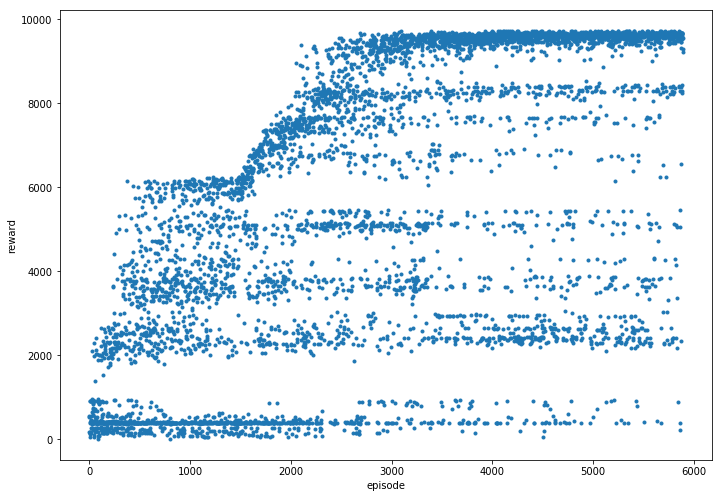

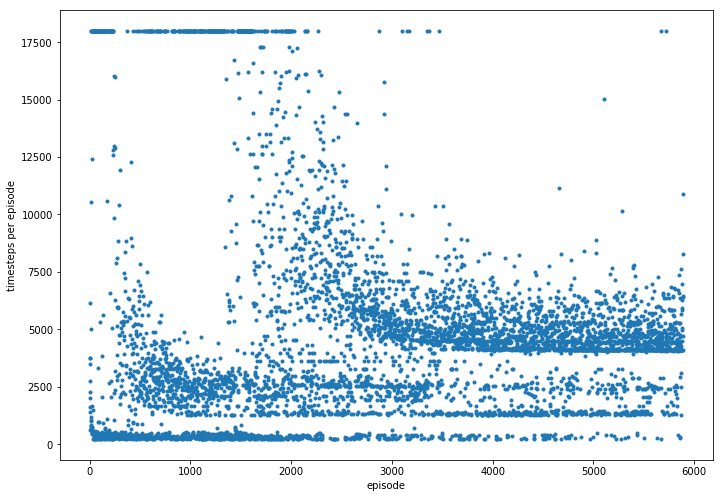

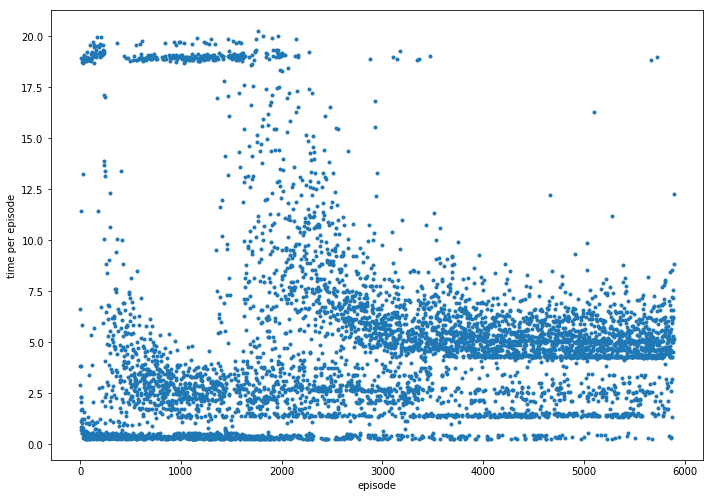

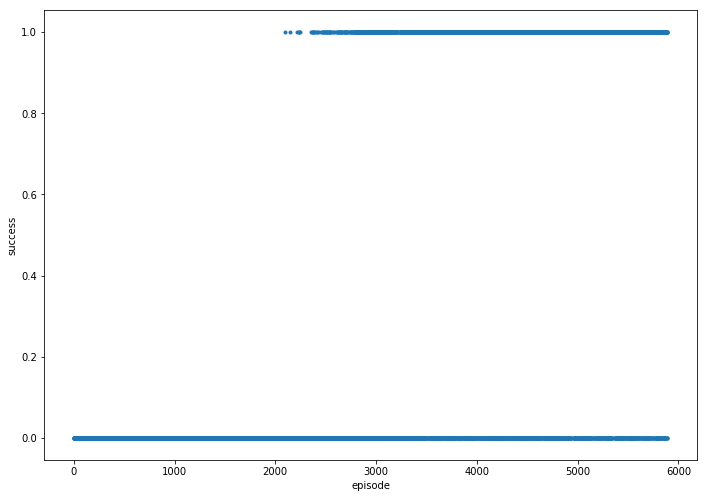

springyardzone1/ppo_traj_0


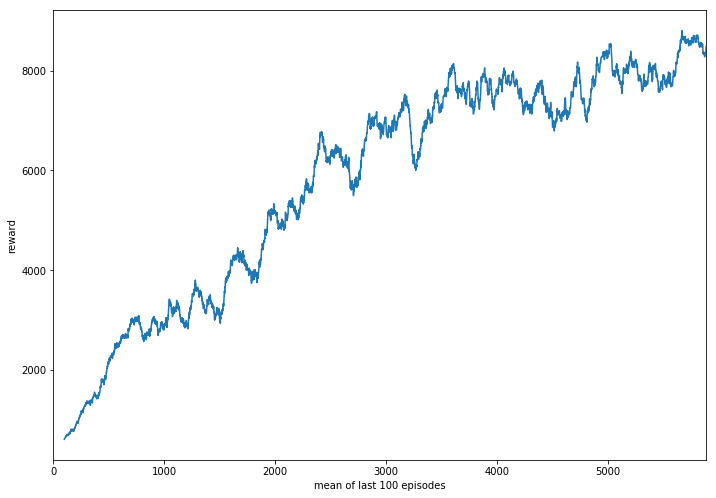

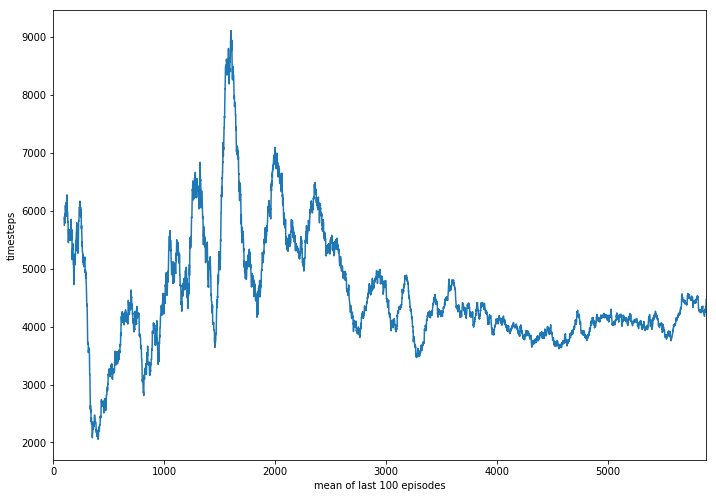

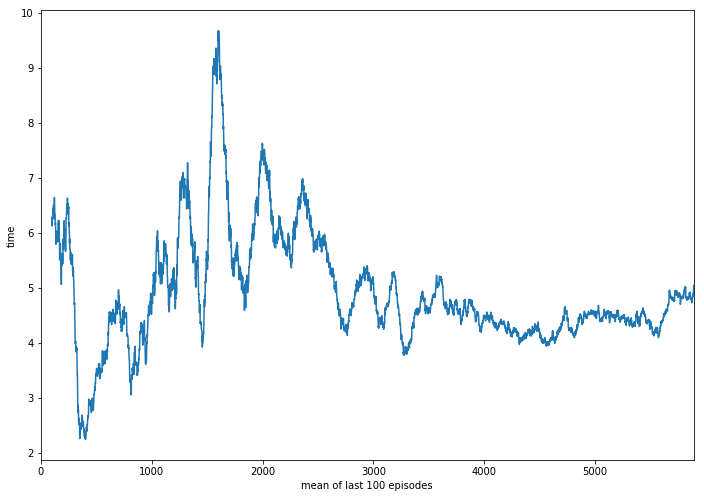

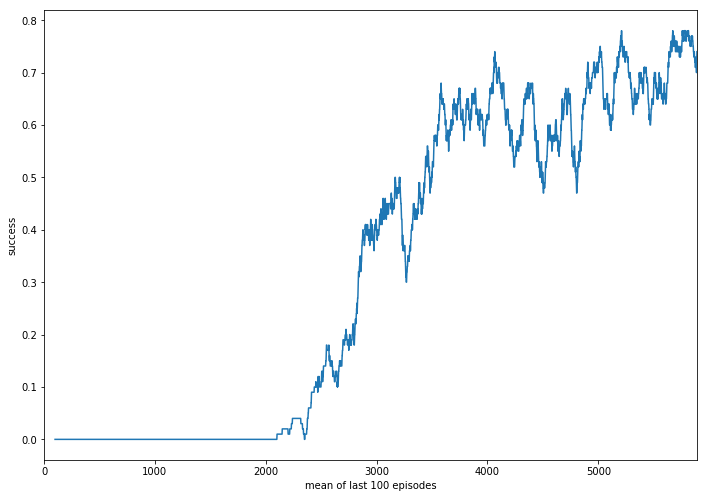

springyardzone3/ppo_traj_0
                  r             l             t        t_diff       success
count  14987.000000  14987.000000  14987.000000  14986.000000  14987.000000
mean    5203.069524   5335.477681  43562.336715      6.117511      0.121038
std     2799.288268   4227.780319  28324.346012      4.783643      0.326183
min      136.655633    472.000000      9.295877      0.541622      0.000000
25%     3164.103569   2679.500000  17526.158831      3.004920      0.000000
50%     4420.284174   4748.000000  42599.391949      5.175058      0.000000
75%     7804.677328   5629.500000  69899.100789      6.663069      0.000000
max     9575.979095  18000.000000  91686.312741     35.367424      1.000000
Mean Reward last 100 Episodes: 7550.343070499897
springyardzone3/ppo_traj_0


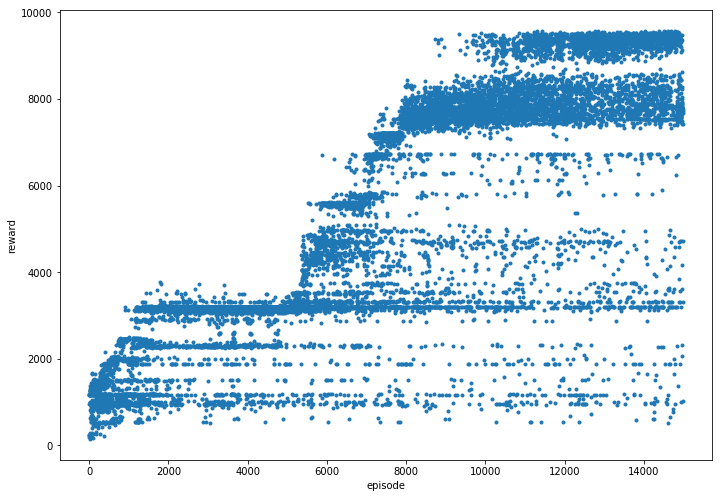

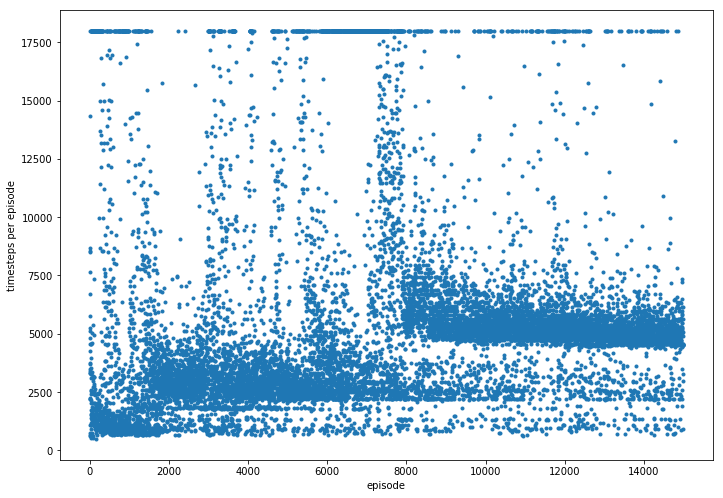

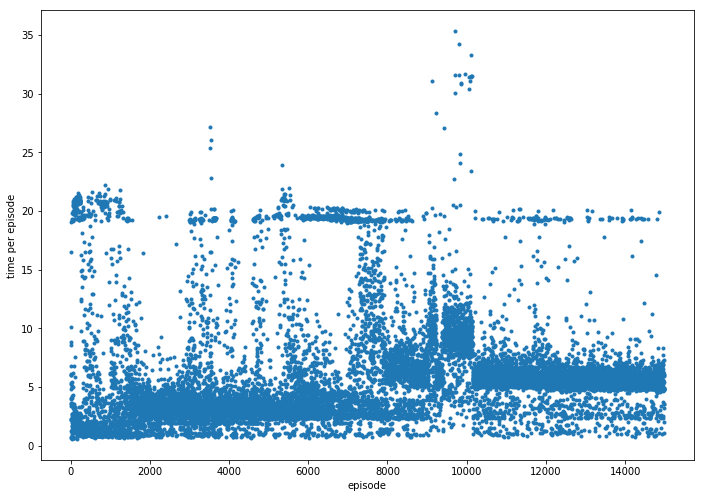

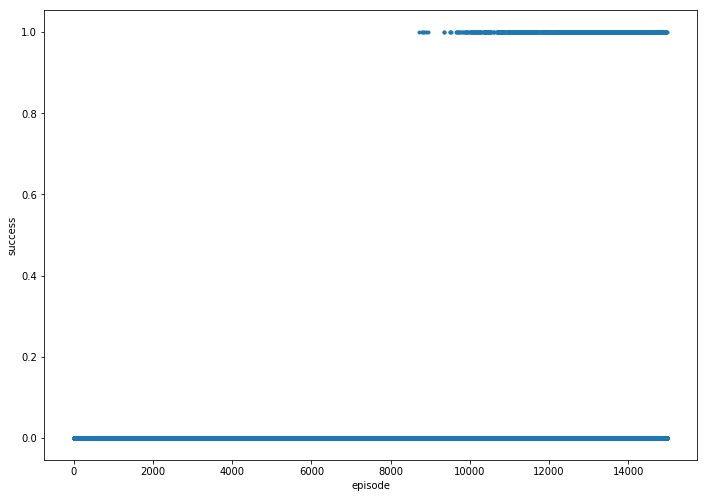

springyardzone3/ppo_traj_0


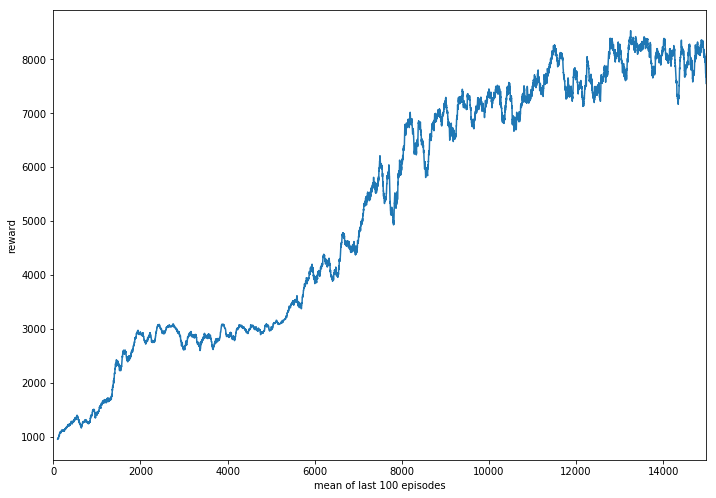

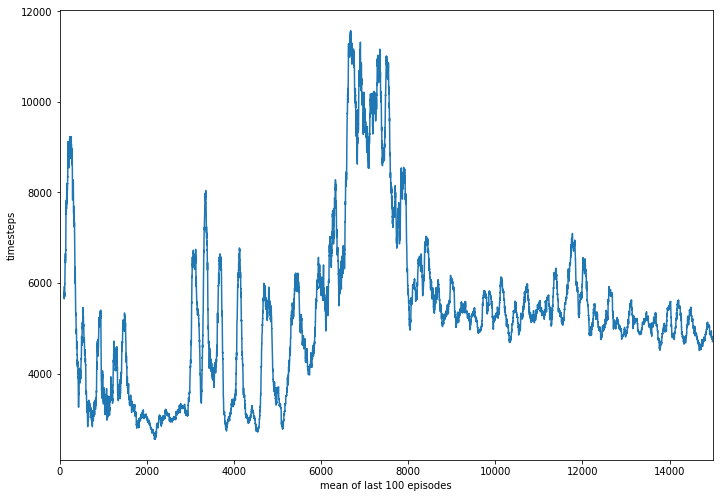

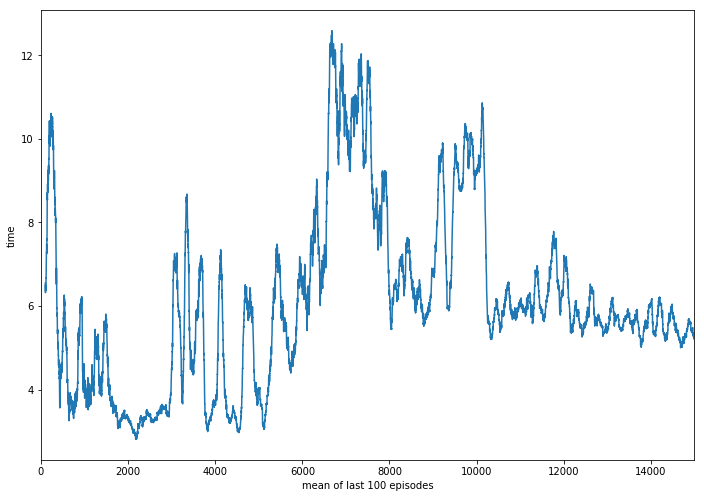

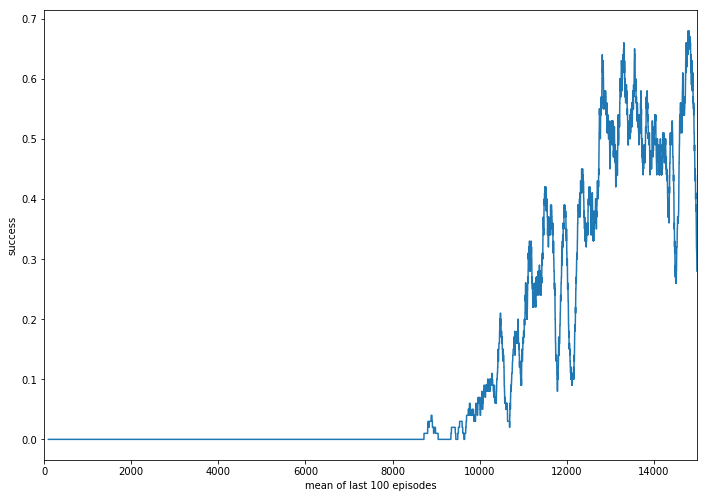

starlightzone1/ppo_traj_1
                 r             l             t       t_diff      success
count  3726.000000   3726.000000   3726.000000  3725.000000  3726.000000
mean   6208.595048   6260.978261  16054.874161     6.950287     0.415727
std    2981.006877   5596.502010   6842.086675     6.164333     0.492913
min     319.621869    735.000000     21.946216     0.827096     0.000000
25%    3596.319283   2465.500000   9952.638950     2.864611     0.000000
50%    6552.242882   4137.000000  17607.198054     4.567042     0.000000
75%    9230.743170   5550.250000  21723.167988     6.338691     1.000000
max    9521.936322  18000.000000  25911.764170    26.192244     1.000000
Mean Reward last 100 Episodes: 8307.513872346877
starlightzone1/ppo_traj_1


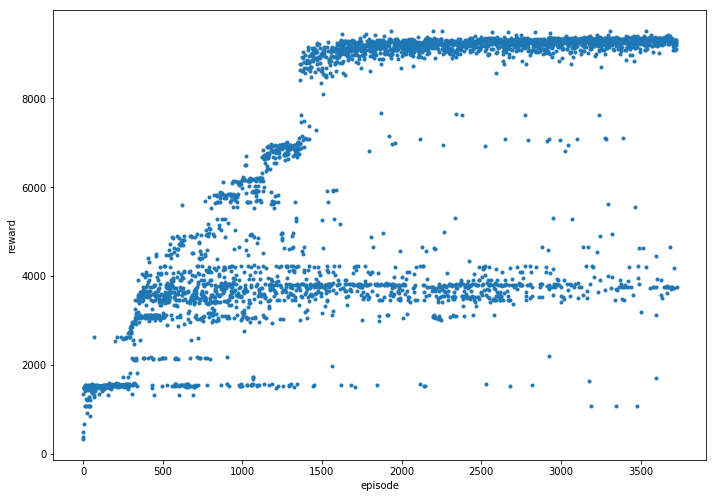

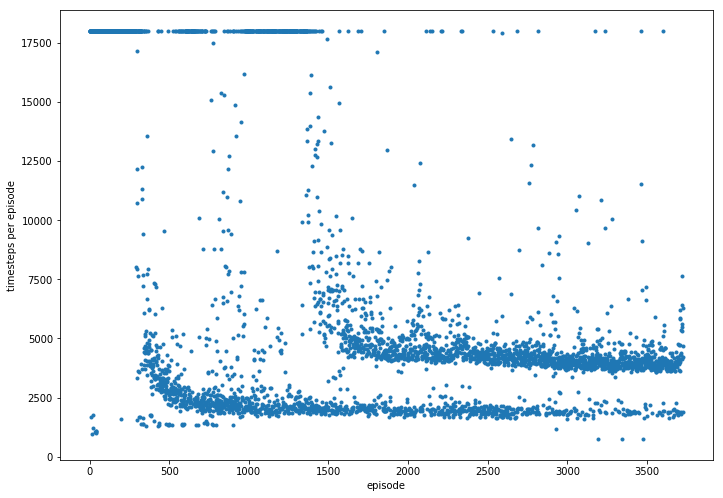

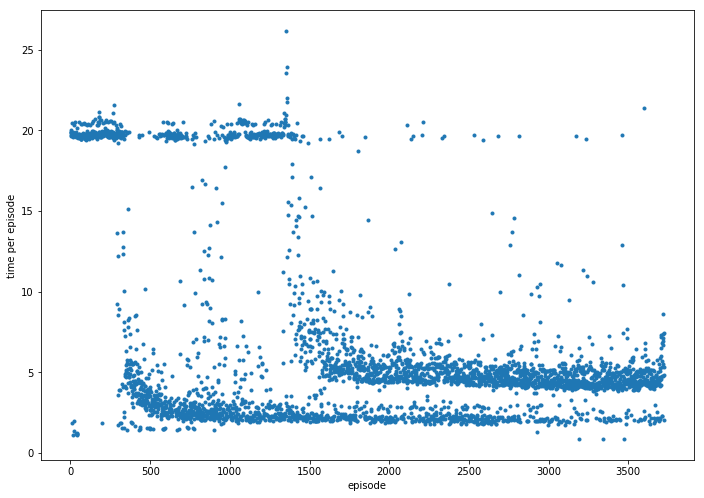

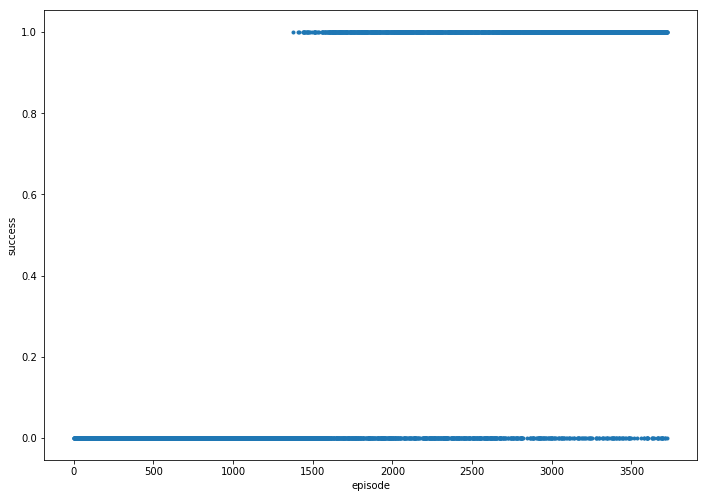

starlightzone1/ppo_traj_1


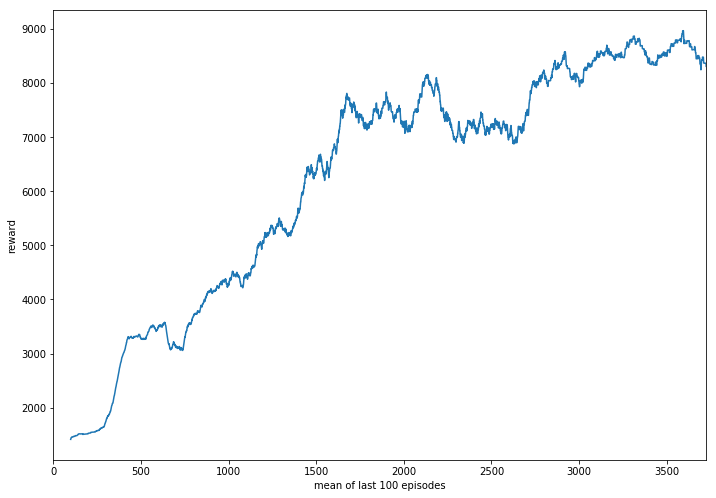

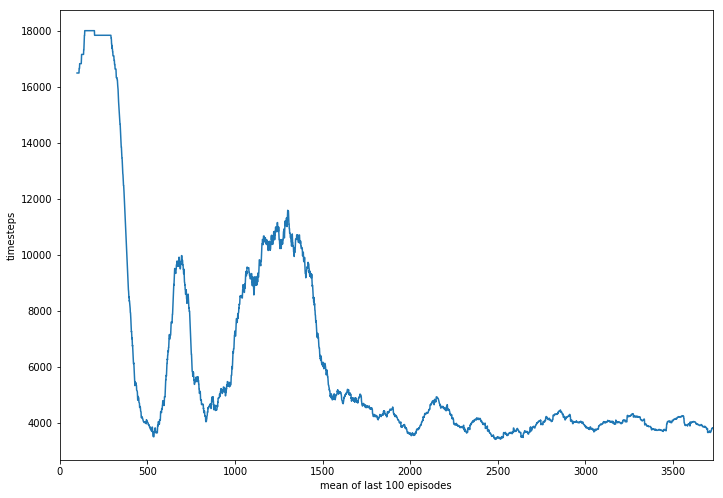

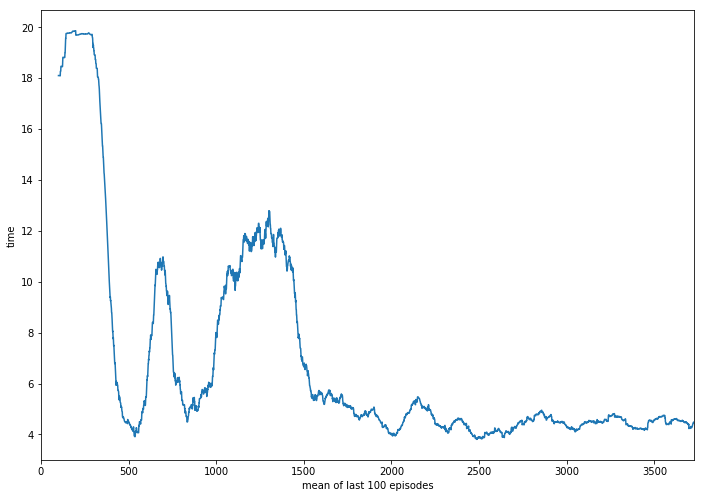

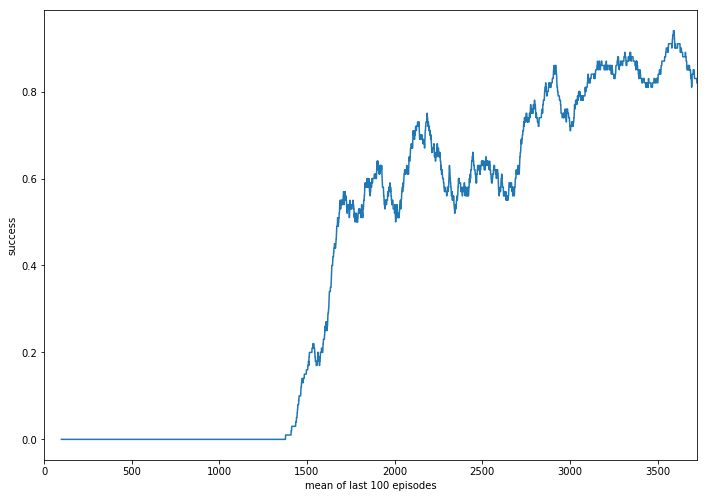

starlightzone3/ppo_traj_1
                  r             l             t        t_diff       success
count  41513.000000  41513.000000  41513.000000  41512.000000  41513.000000
mean    2802.470227   1825.746224  39638.105932      2.134903      0.009780
std     1221.810423   1874.058885  22462.711582      2.164193      0.098411
min        2.357255    280.000000      3.484539      0.333235      0.000000
25%     2397.328443   1138.000000  21458.795074      1.290719      0.000000
50%     2571.765373   1223.000000  39091.424662      1.435883      0.000000
75%     2583.551629   1675.000000  55921.908789      2.056595      0.000000
max     9610.459798  18000.000000  88627.560475     24.083754      1.000000
Mean Reward last 100 Episodes: 7159.765489692688
starlightzone3/ppo_traj_1


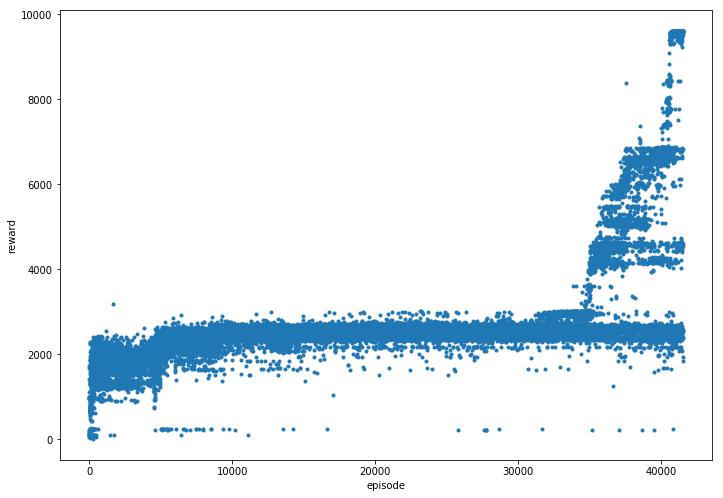

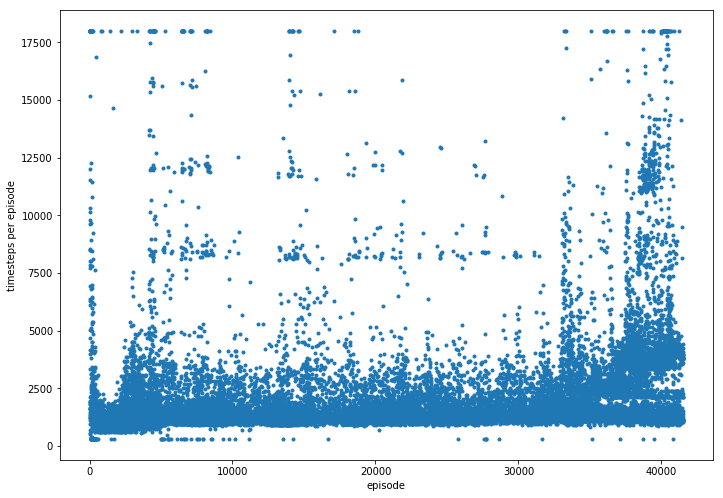

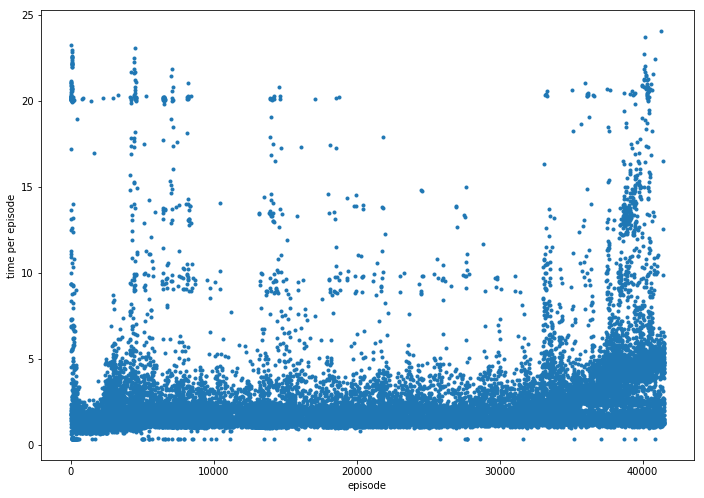

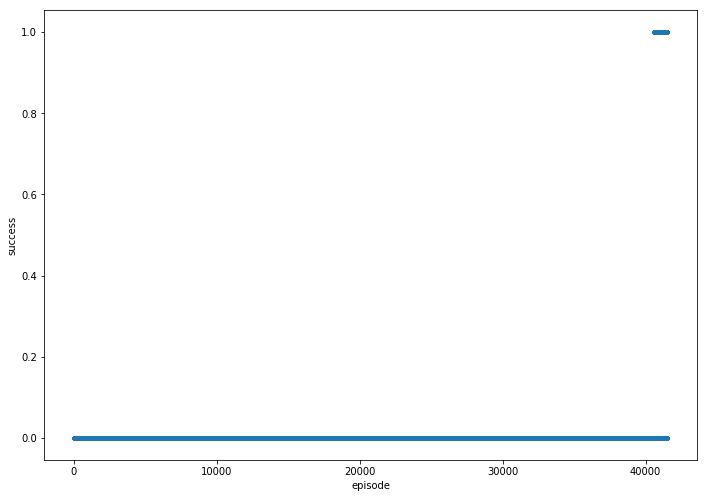

starlightzone3/ppo_traj_1


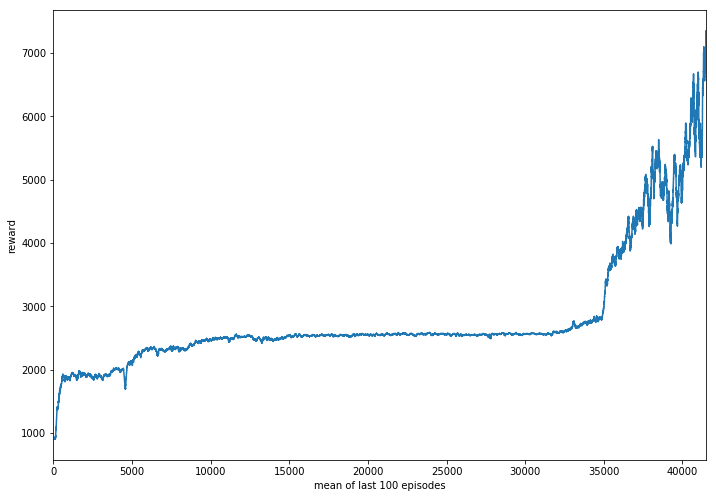

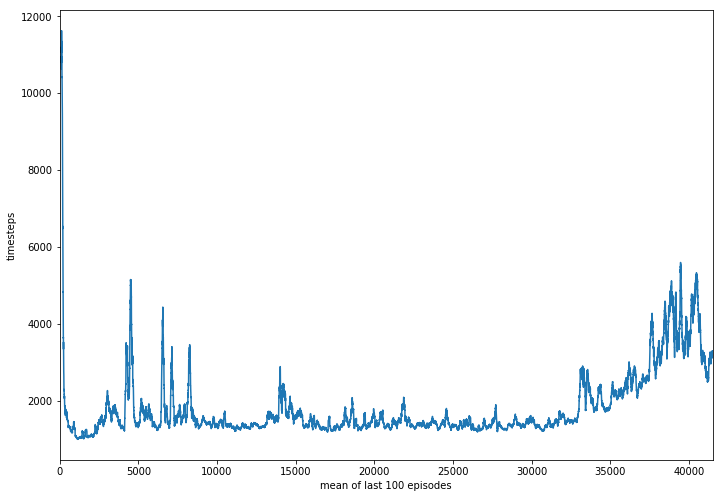

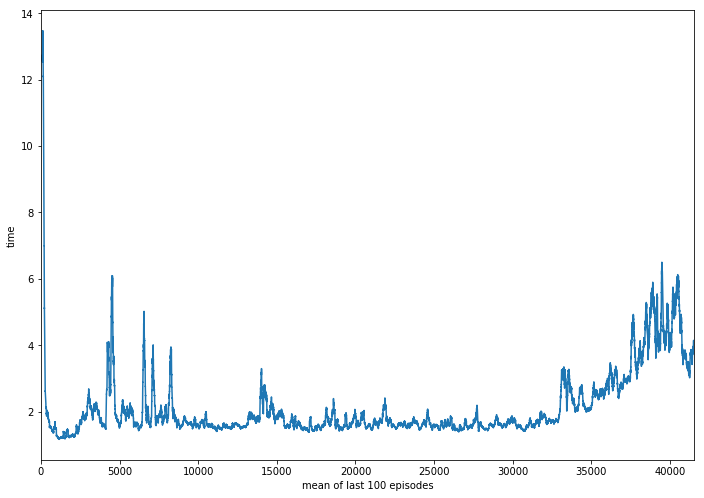

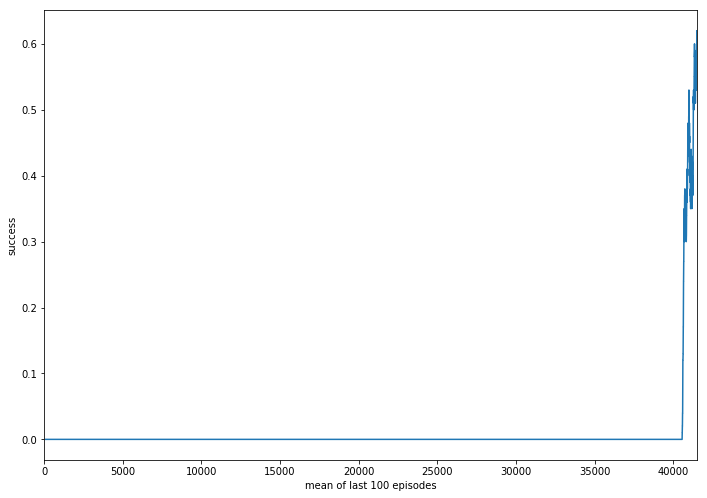

labyrinthzone1/ppo_traj_3
                  r             l             t        t_diff       success
count  14640.000000  14640.000000  14640.000000  14639.000000  14640.000000
mean    4759.424772   5235.228825  41096.303105      6.291254      0.024044
std     2150.981328   3073.709871  26323.711324      3.760493      0.153190
min      117.133865    448.000000     22.159759      0.553685      0.000000
25%     3168.567568   3035.000000  19200.529902      3.633872      0.000000
50%     4118.993087   4351.500000  37262.042952      5.275939      0.000000
75%     6591.676157   6657.250000  62194.791452      7.940812      0.000000
max     9656.071709  18000.000000  92119.823079     32.604728      1.000000
Mean Reward last 100 Episodes: 8174.412781643868
labyrinthzone1/ppo_traj_3


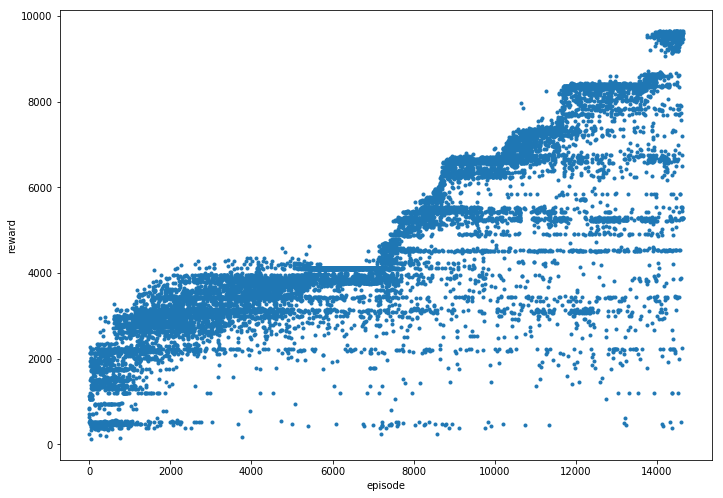

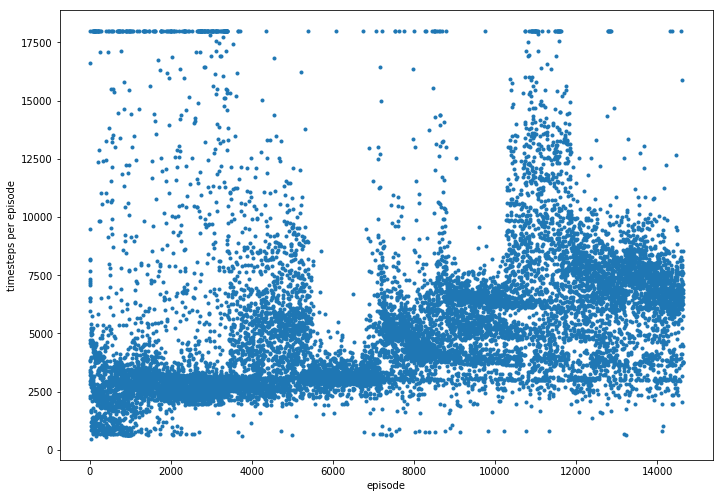

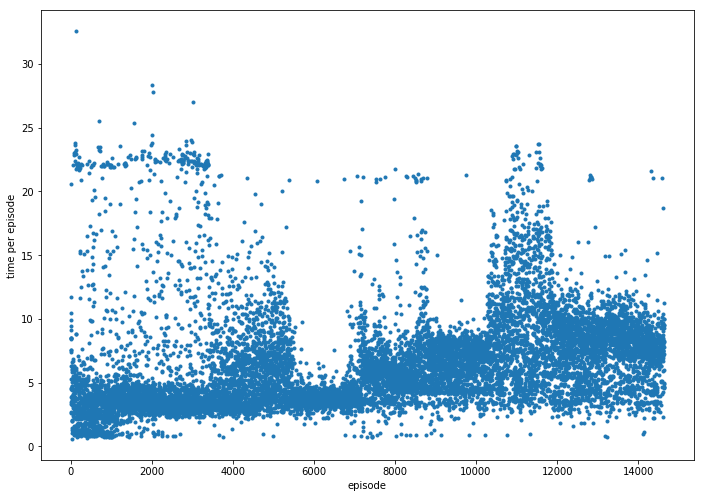

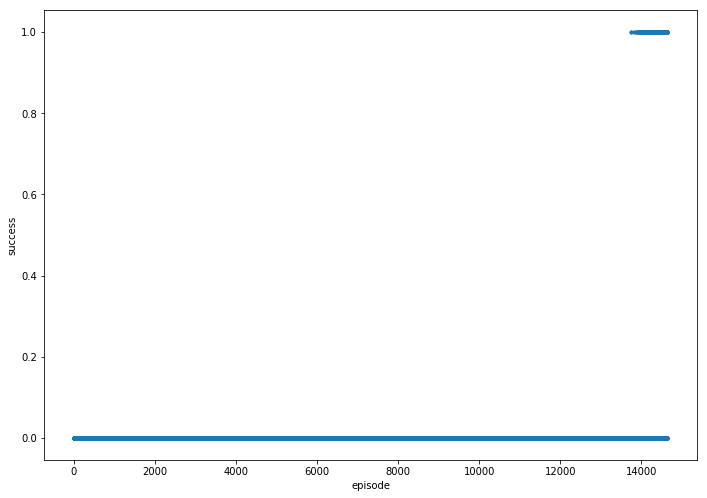

labyrinthzone1/ppo_traj_3


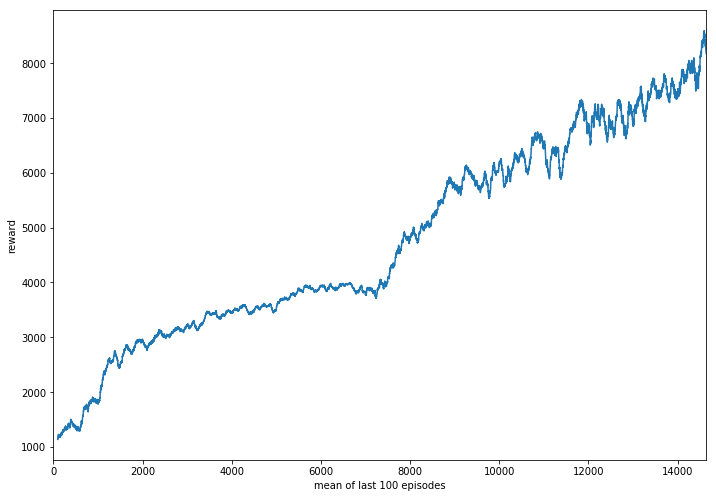

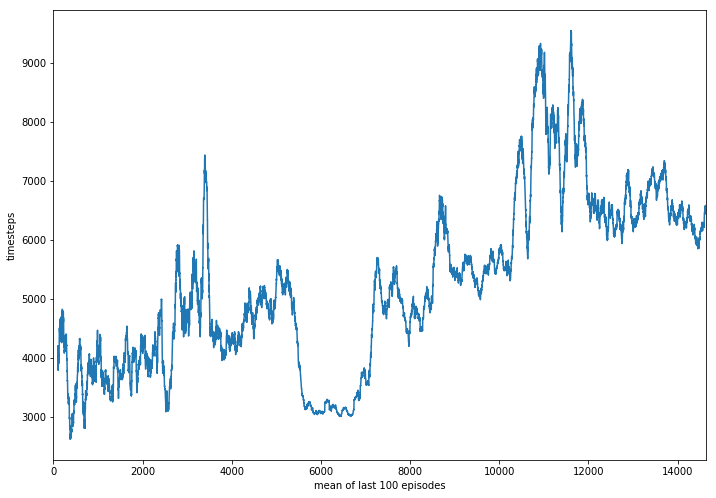

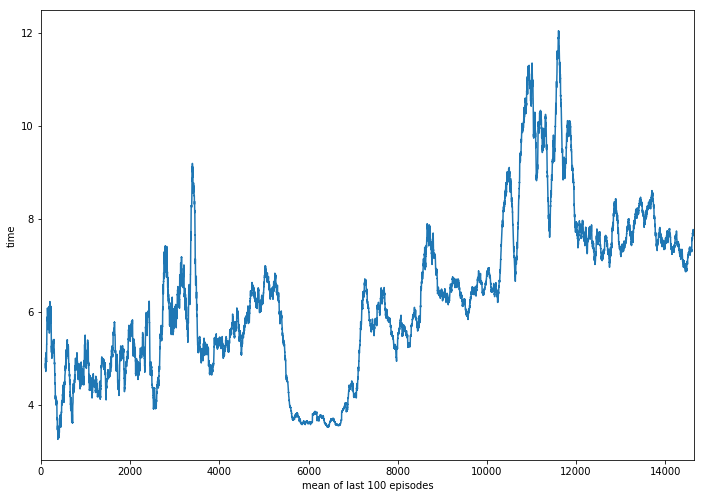

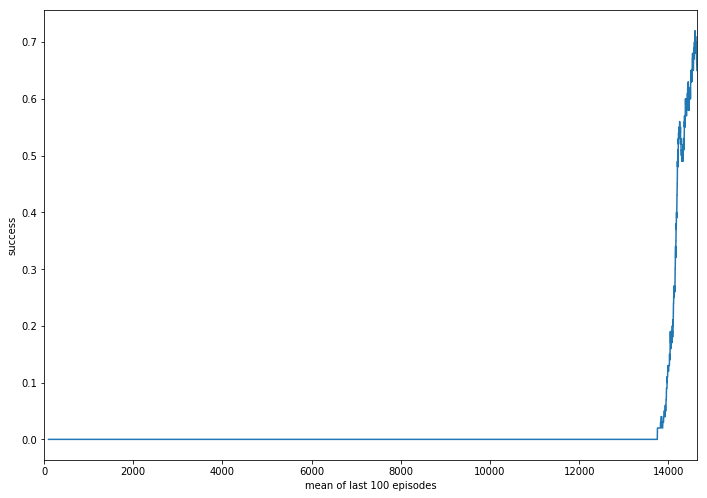

labyrinthzone2/ppo_traj_4
                  r             l              t        t_diff  success
count  14448.000000  14448.000000   14448.000000  14447.000000  14448.0
mean    2317.611205   5534.756091   37903.165355      8.234785      0.0
std     1251.555610   7215.349209   36752.762325     10.677171      0.0
min     -769.433974    306.000000      19.785042      0.459203      0.0
25%     1618.558863    859.000000    6395.153857      1.279300      0.0
50%     1645.765221   1148.000000   22627.229675      1.794598      0.0
75%     3528.114371  10953.250000   64790.232798     16.456490      0.0
max     5737.073659  18000.000000  118987.717598     35.640934      0.0
Mean Reward last 100 Episodes: 3784.0108368098736
labyrinthzone2/ppo_traj_4


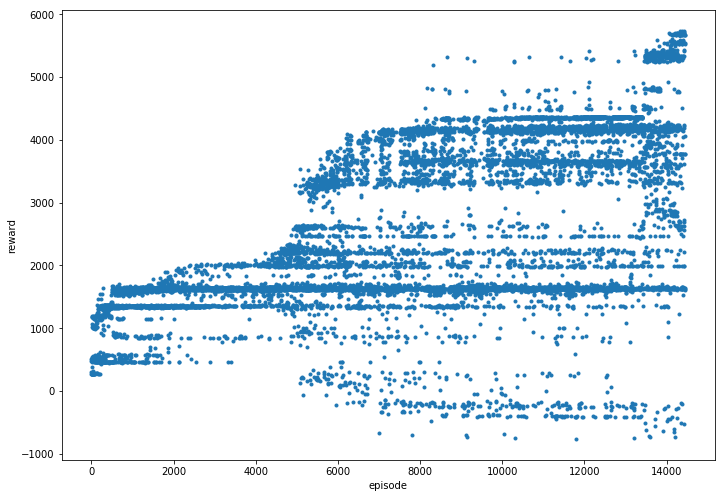

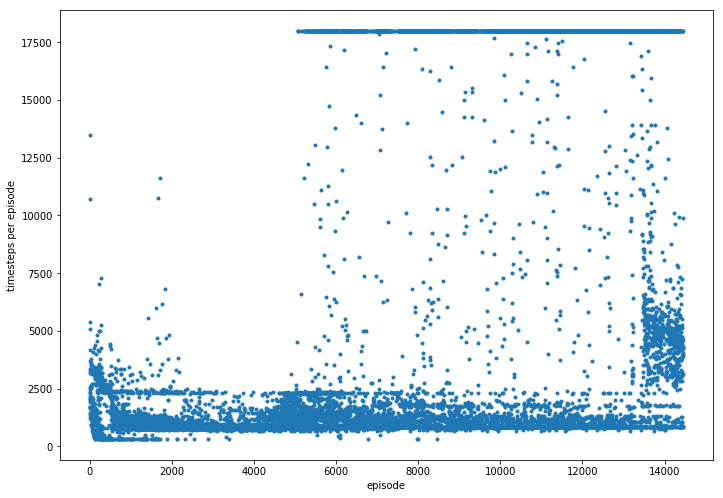

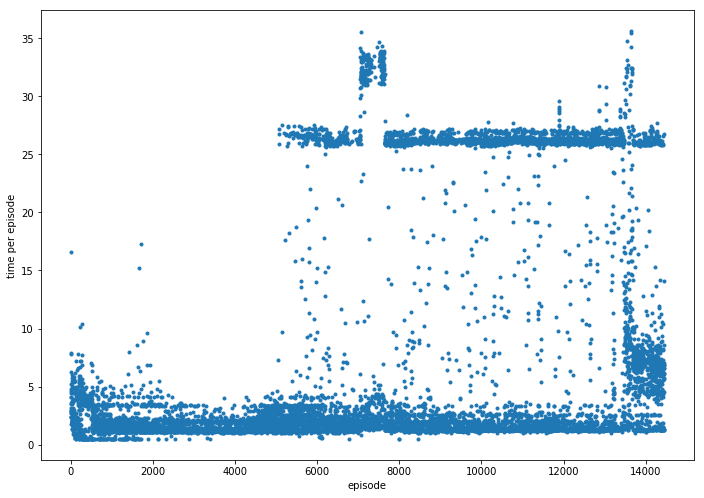

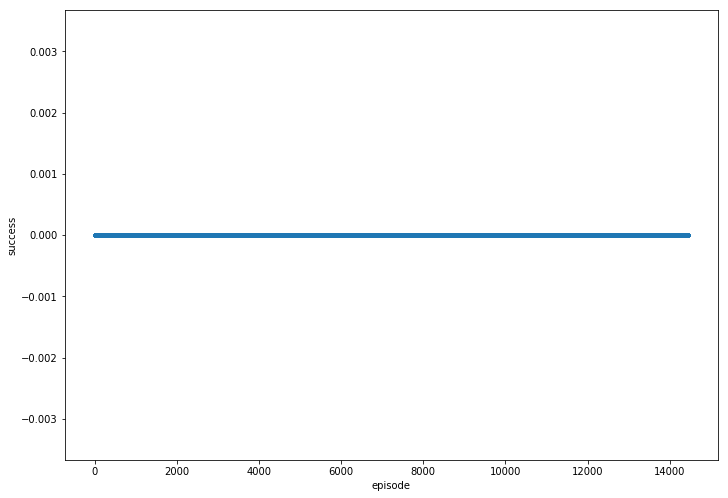

labyrinthzone2/ppo_traj_4


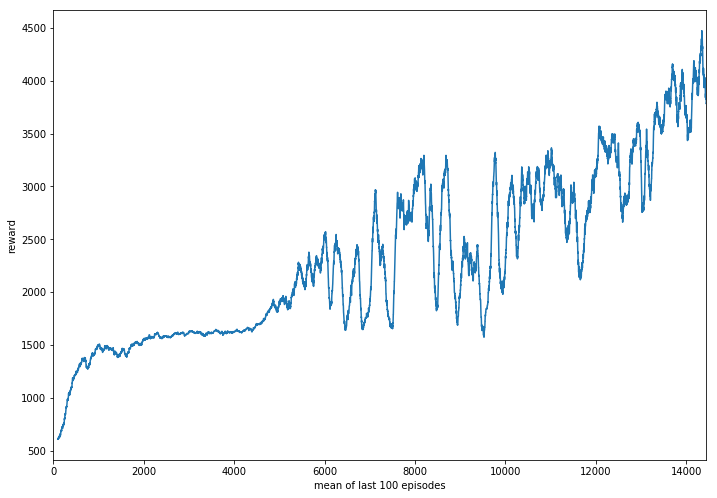

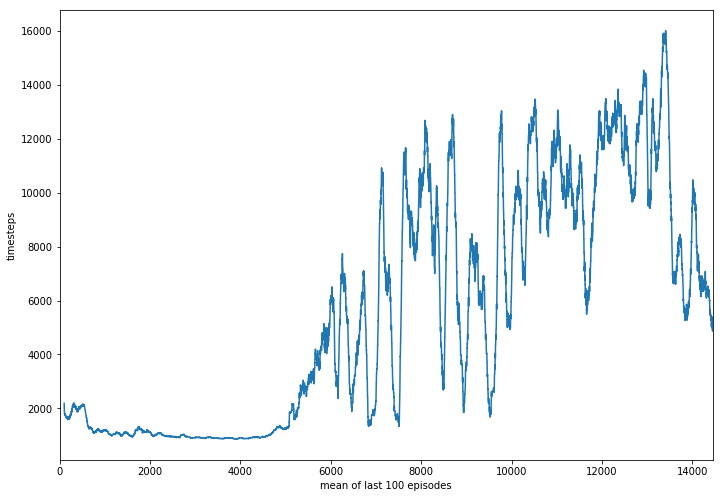

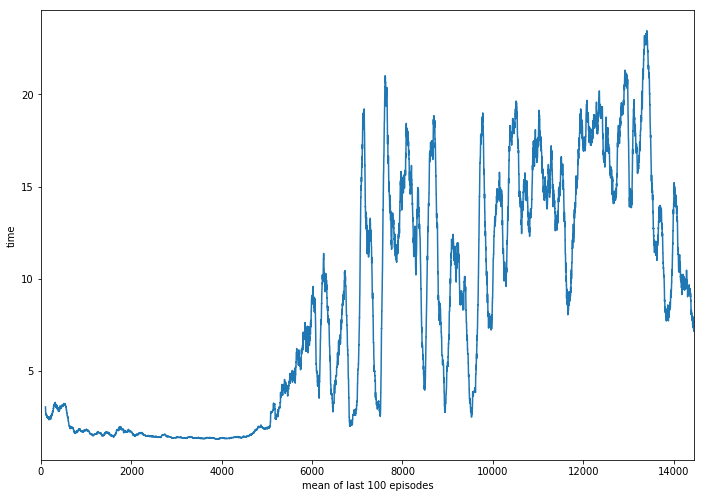

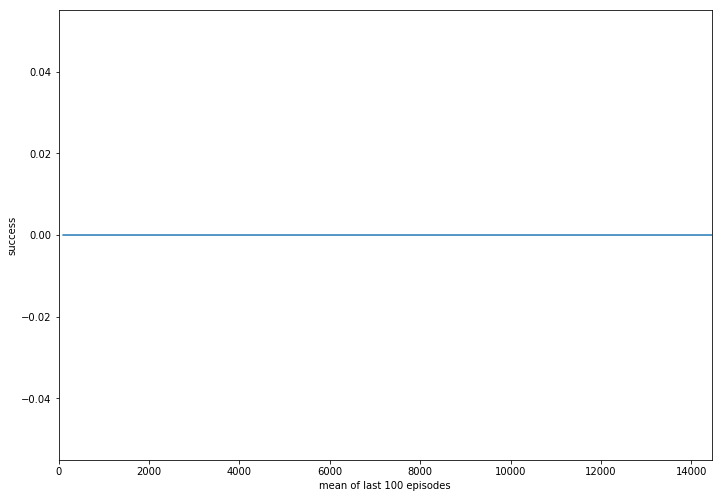

labyrinthzone3/ppo_traj_2
                  r             l             t        t_diff  success
count  11118.000000  11118.000000  11118.000000  11117.000000  11118.0
mean    2514.431339   3164.991455  24952.504001      3.776131      0.0
std      916.798880   3515.986087   9406.162560      4.242296      0.0
min      193.534230    242.000000     23.267342      0.305591      0.0
25%     1955.090701   1811.250000  18431.963726      2.118760      0.0
50%     2147.308385   2306.000000  24895.291719      2.918044      0.0
75%     3500.731434   2923.000000  32223.797098      3.367118      0.0
max     4025.904581  18000.000000  42002.517831     26.742809      0.0
Mean Reward last 100 Episodes: 3662.822749198675
labyrinthzone3/ppo_traj_2


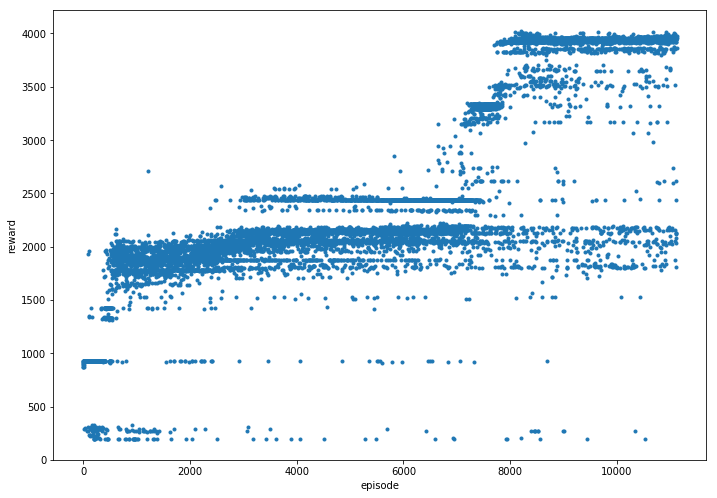

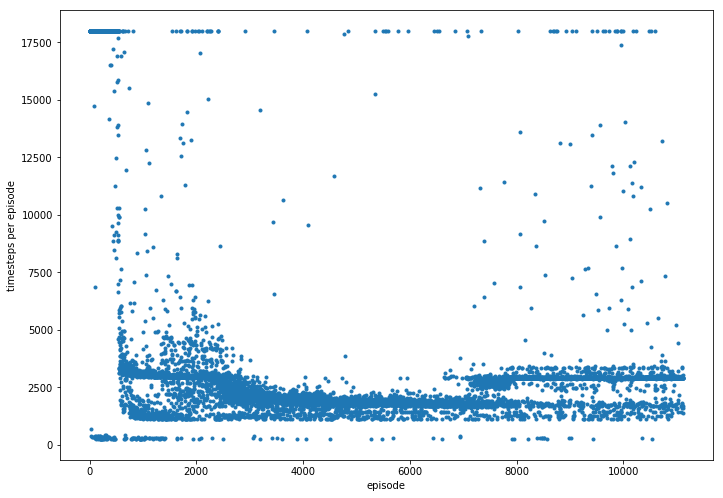

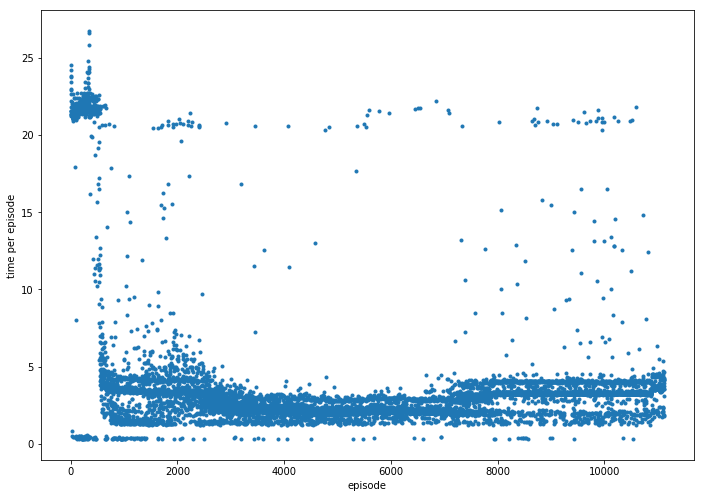

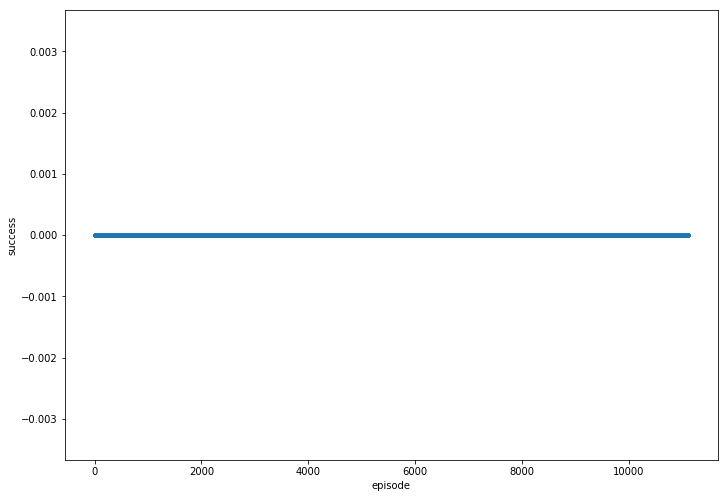

labyrinthzone3/ppo_traj_2


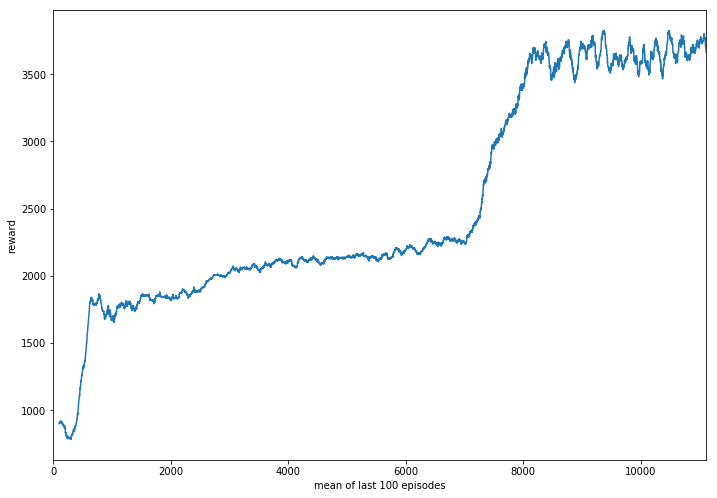

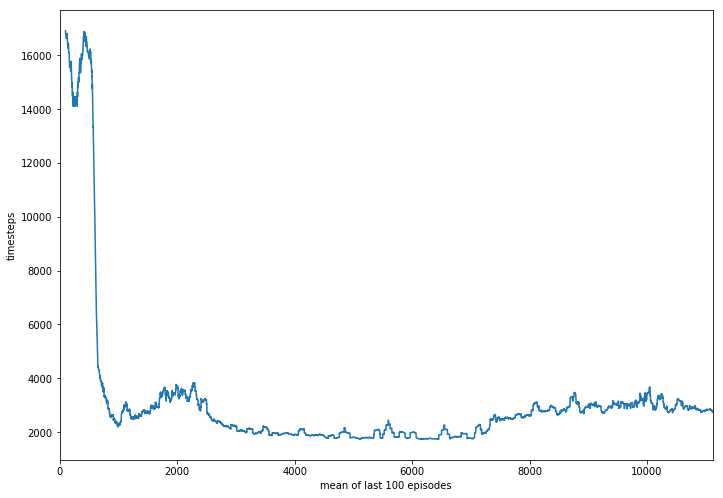

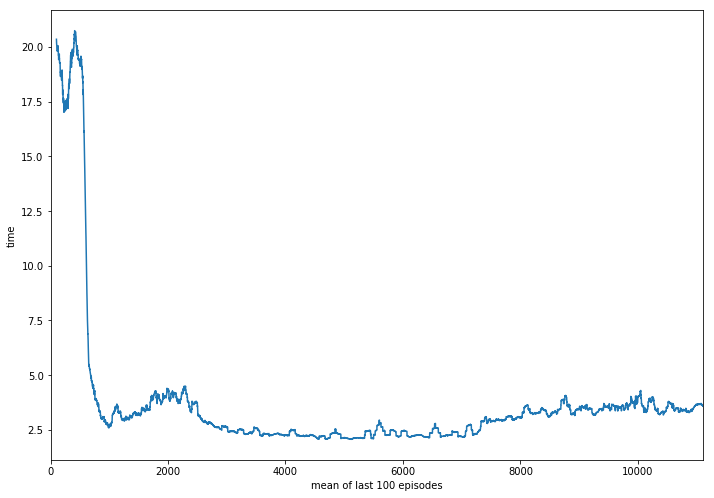

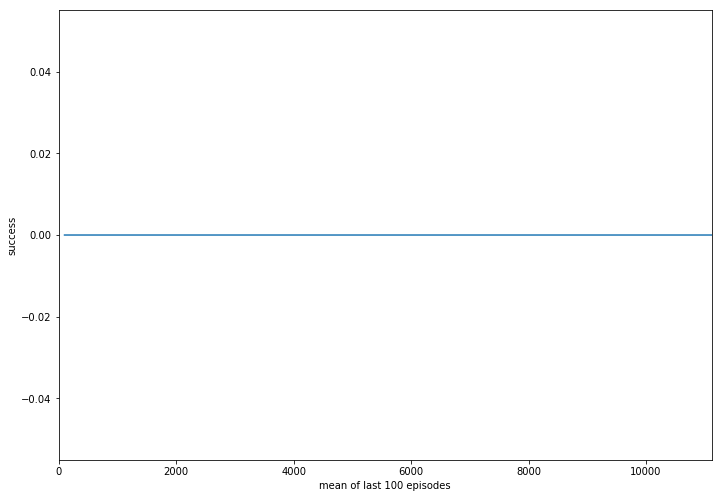

scrapbrainzone1/ppo_traj_0
                  r             l             t        t_diff       success
count  15709.000000  15709.000000  15709.000000  15708.000000  15709.000000
mean    4208.061808   4350.365077  34922.240770      4.968052      0.110701
std     2926.529822   3659.847831  23545.778347      4.098584      0.313771
min        1.934652    299.000000     21.204470      0.344957      0.000000
25%      953.783311   2136.000000  11065.241347      2.465383      0.000000
50%     4372.312960   3989.000000  34555.705743      4.560796      0.000000
75%     4538.692986   5057.000000  54192.038786      5.771745      0.000000
max     9661.888462  18000.000000  78059.365808     23.885601      1.000000
Mean Reward last 100 Episodes: 7769.602830389738
scrapbrainzone1/ppo_traj_0


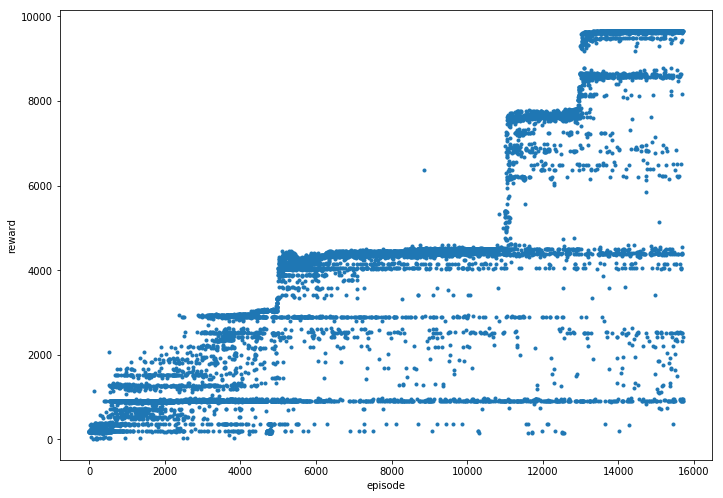

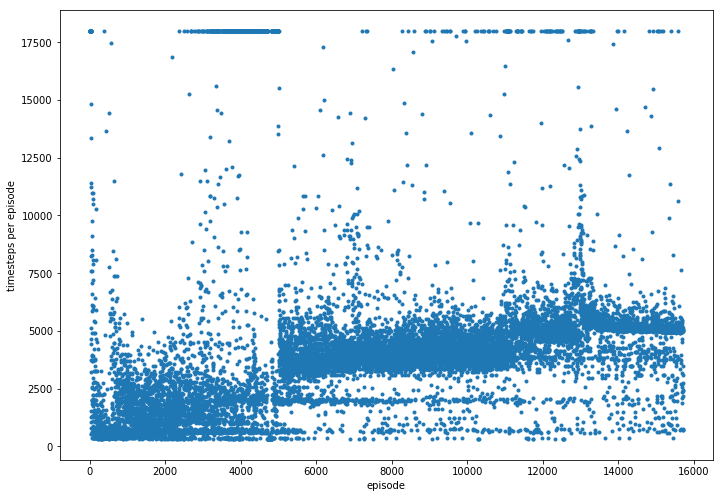

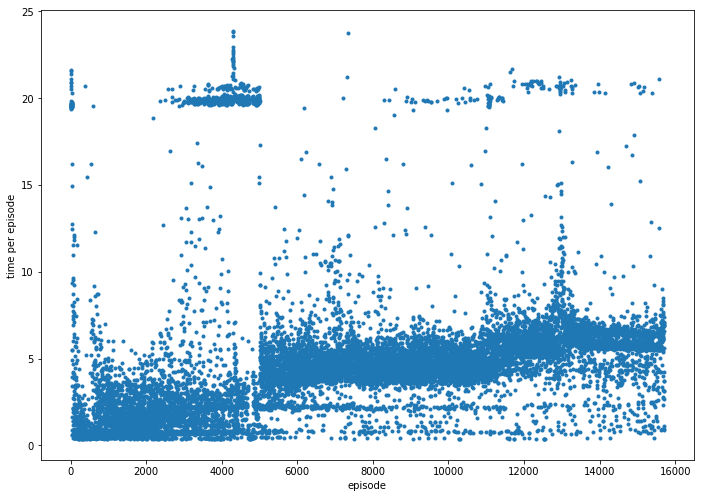

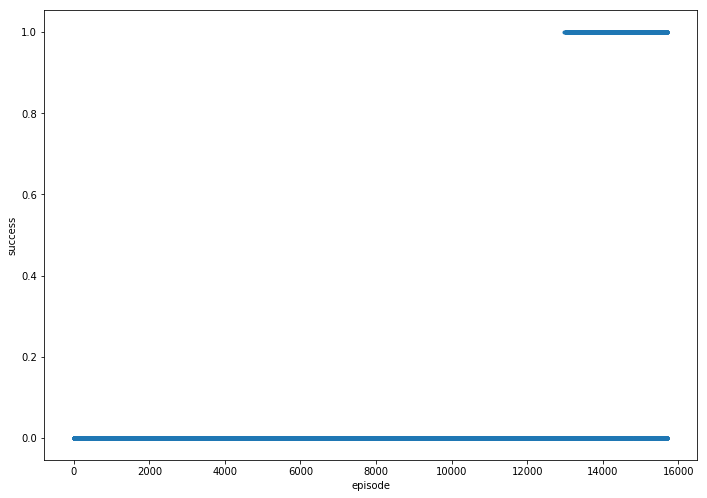

scrapbrainzone1/ppo_traj_0


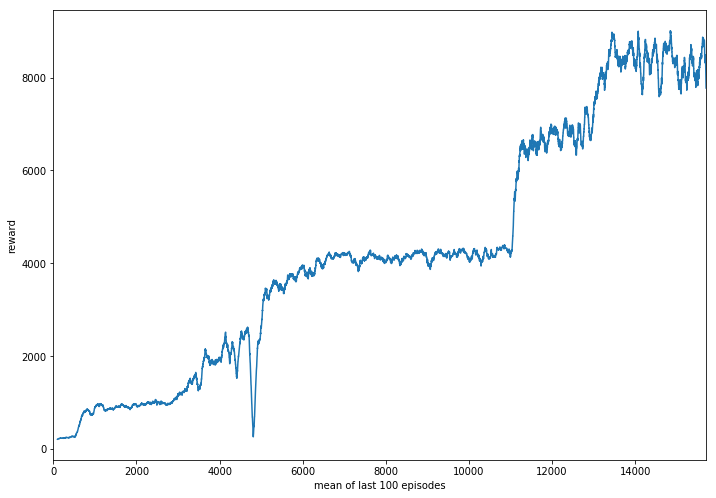

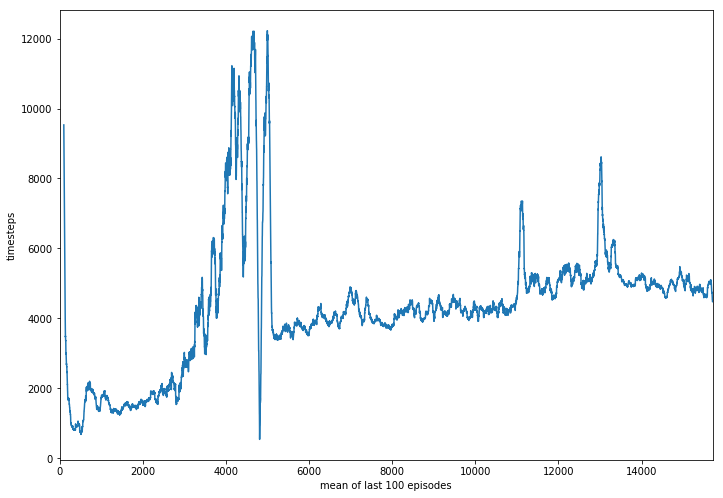

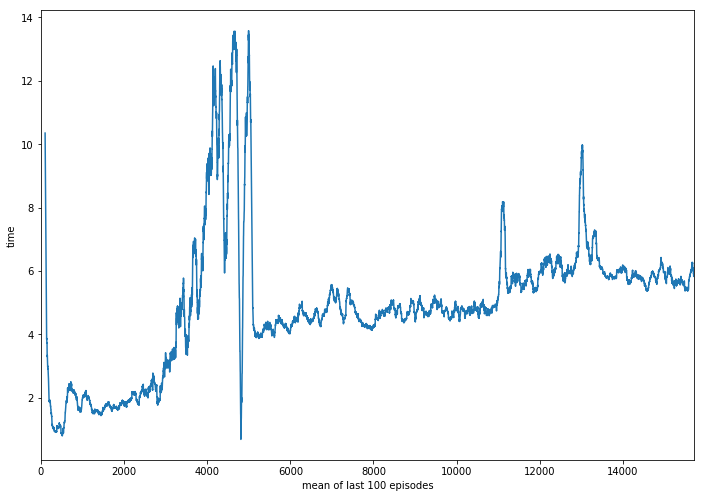

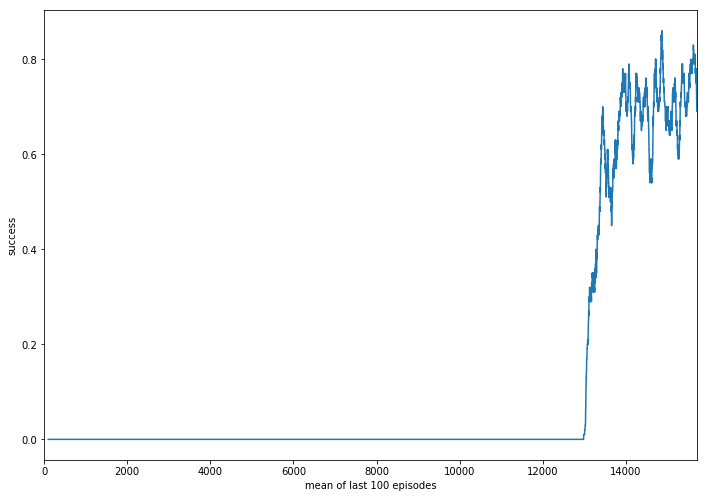

scrapbrainzone2/ppo_traj_0
                  r             l             t        t_diff       success
count  10836.000000  10836.000000  10836.000000  10835.000000  10836.000000
mean    4365.132029   4166.558232  37663.440544      7.082498      0.218069
std     3290.985511   3552.481905  24186.629302      5.992800      0.412954
min        8.899877    401.000000     33.467171      0.677738      0.000000
25%     1448.060468   1741.000000  13897.171371      2.963185      0.000000
50%     3864.771311   3570.000000  40097.021142      6.069841      0.000000
75%     7082.139859   4702.000000  58701.283937      8.051644      0.000000
max     9717.367558  18000.000000  76772.337685     39.683891      1.000000
Mean Reward last 100 Episodes: 8262.544063146115
scrapbrainzone2/ppo_traj_0


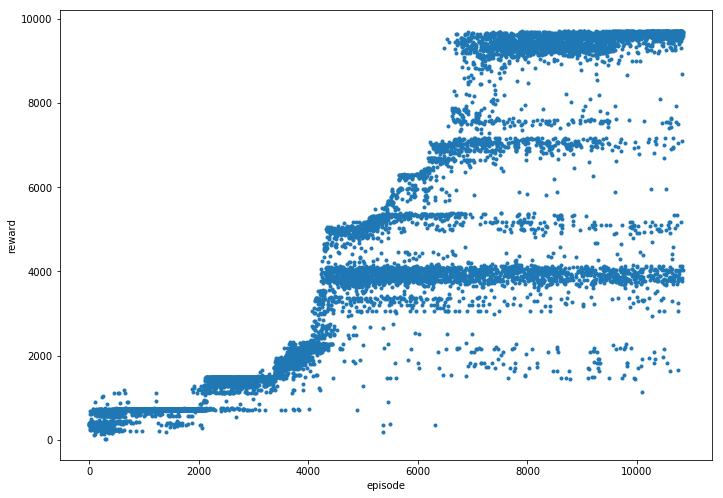

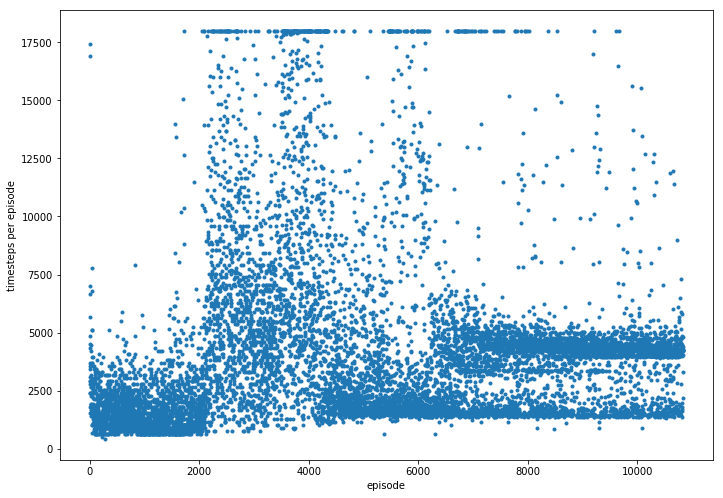

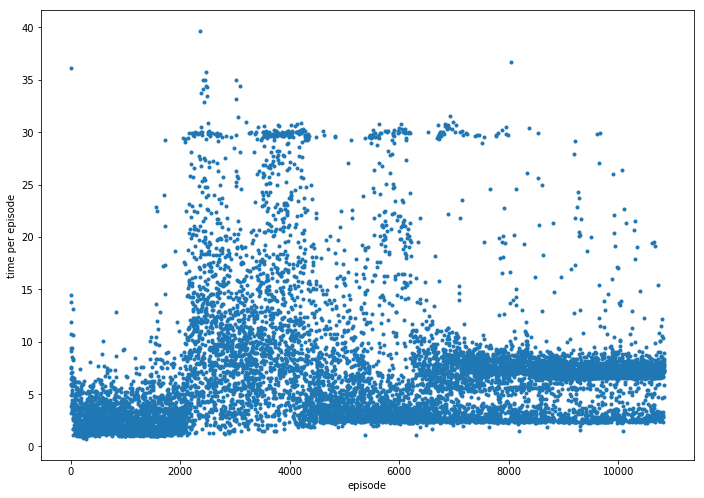

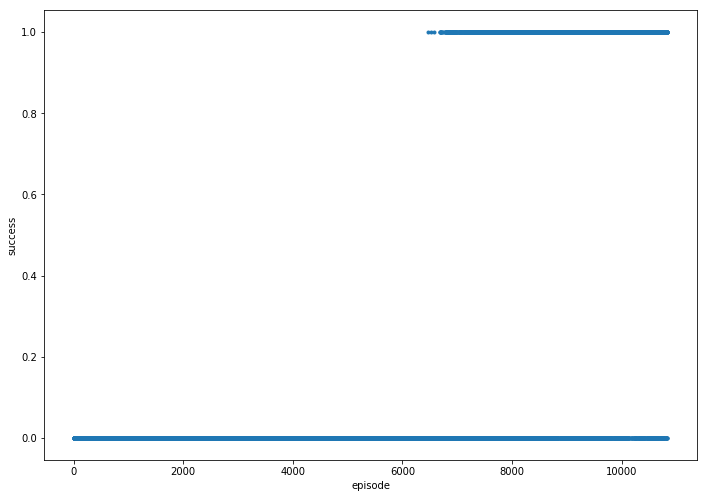

scrapbrainzone2/ppo_traj_0


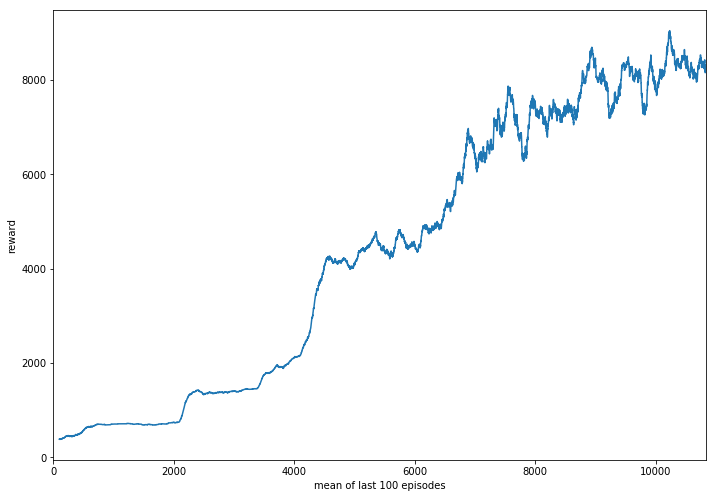

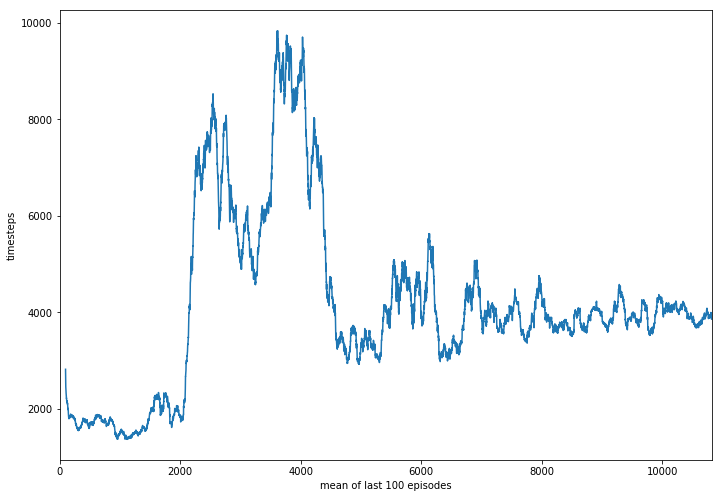

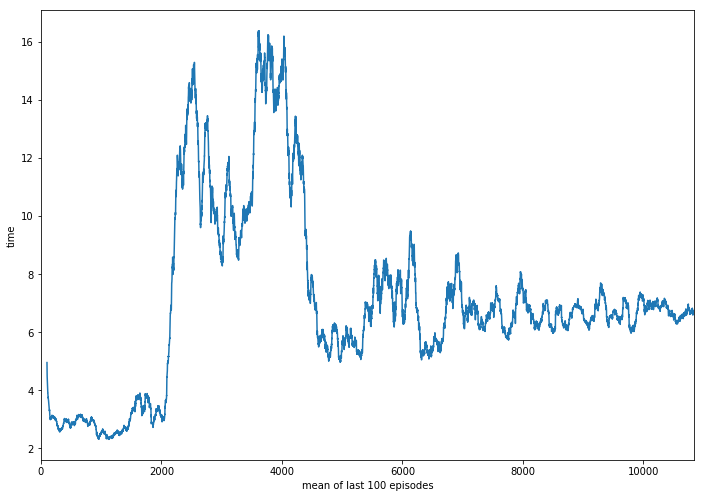

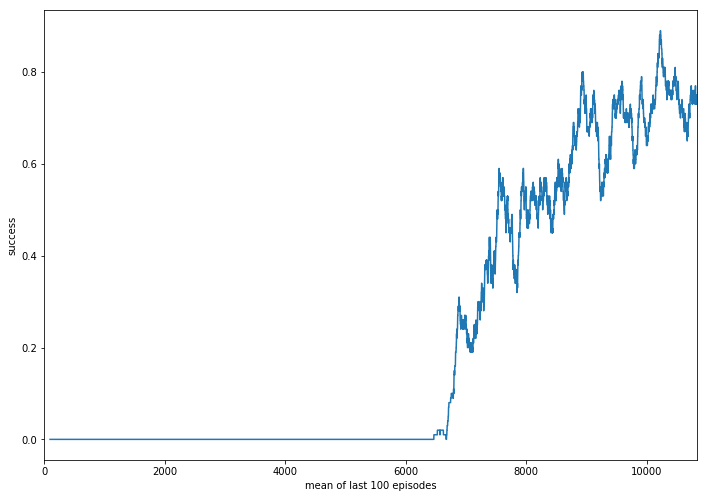

In [32]:
best_run_array = [
    'marblezone1/ppo_traj_3',
    'marblezone2/ppo_traj_1',
    'marblezone3/ppo_traj_4',
    'springyardzone1/ppo_traj_0',
    'springyardzone3/ppo_traj_0',
    'starlightzone1/ppo_traj_1',
    'starlightzone3/ppo_traj_1',
    'labyrinthzone1/ppo_traj_3',
    'labyrinthzone2/ppo_traj_4',
    'labyrinthzone3/ppo_traj_2',
    'scrapbrainzone1/ppo_traj_0',
    'scrapbrainzone2/ppo_traj_0',
]

get_results(best_run_array)